In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd 
data = pd.read_csv('C:/Users/MJ/Desktop/새 폴더 (2)/[2] 교재 data/breast-cancer-wisconsin.csv')

In [2]:
data

,code,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
678,776715,3,1,1,1,3,2,1,1,1,0
679,841769,2,1,1,1,2,1,1,1,1,0
680,888820,5,10,10,3,7,3,8,10,2,1
681,897471,4,8,6,4,3,4,10,6,1,1


In [3]:
X=data[data.columns[1:10]]
y=data[["Class"]]

In [4]:
X

,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
678,3,1,1,1,3,2,1,1,1
679,2,1,1,1,2,1,1,1,1
680,5,10,10,3,7,3,8,10,2
681,4,8,6,4,3,4,10,6,1


In [5]:
y

,Class
0,0
1,0
2,0
3,0
4,0
...,...
678,0
679,0
680,1
681,1


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)
X_scaled_train=scaler.transform(X_train)
X_scaled_test=scaler.transform(X_test)

In [8]:
scaler

MinMaxScaler()

In [9]:
X_scaled_train, X_scaled_test

(array([[0.22222222, 0.        , 0.        , ..., 0.11111111, 0.11111111,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.22222222, 0.        ,
         0.        ],
        [0.44444444, 0.        , 0.        , ..., 0.22222222, 0.        ,
         0.        ],
        ...,
        [1.        , 0.        , 0.        , ..., 0.44444444, 0.33333333,
         0.        ],
        [0.11111111, 0.        , 0.        , ..., 0.11111111, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.11111111, 0.        ,
         0.        ]]),
 array([[0.44444444, 0.11111111, 0.11111111, ..., 0.11111111, 0.        ,
         0.        ],
        [0.33333333, 0.        , 0.        , ..., 0.22222222, 0.11111111,
         0.        ],
        [0.44444444, 0.11111111, 0.11111111, ..., 0.11111111, 0.11111111,
         0.        ],
        ...,
        [0.66666667, 0.33333333, 0.55555556, ..., 0.33333333, 0.22222222,
         0.        ],
        [0.2

In [10]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_scaled_train, y_train)
pred_train=model.predict(X_scaled_train)
model.score(X_scaled_train, y_train)

0.97265625

In [11]:
from sklearn.metrics import confusion_matrix
confusion_train=confusion_matrix(y_train, pred_train)
print("훈련데이터 오차행렬:\n", confusion_train)

훈련데이터 오차행렬:
 [[328   5]
 [  9 170]]


In [12]:
from sklearn.metrics import classification_report
cfreport_train=classification_report(y_train, pred_train)
print("분류예측 레포트:\n", cfreport_train)

분류예측 레포트:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       333
           1       0.97      0.95      0.96       179

    accuracy                           0.97       512
   macro avg       0.97      0.97      0.97       512
weighted avg       0.97      0.97      0.97       512



In [13]:
pred_test=model.predict(X_scaled_test)
model.score(X_scaled_test, y_test)

0.9590643274853801

In [14]:
confusion_test=confusion_matrix(y_test, pred_test)
print("테스트데이터 오차행렬:\n", confusion_test)

테스트데이터 오차행렬:
 [[106   5]
 [  2  58]]


In [15]:
from sklearn.metrics import classification_report
cfreport_test=classification_report(y_test, pred_test)
print("분류예측 레포트:\n", cfreport_test)

분류예측 레포트:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97       111
           1       0.92      0.97      0.94        60

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [16]:
param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]}
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_scaled_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]})

In [17]:
print("Best Parameter: {}".format(grid_search.best_params_))
print("Best Score: {:.4f}".format(grid_search.best_score_))
print("TestSet Score: {:.4f}".format(grid_search.score(X_scaled_test, y_test)))

Best Parameter: {'C': 10}
Best Score: 0.9726
TestSet Score: 0.9591


In [18]:
from scipy.stats import randint
param_distribs={'C': randint(low=0.001, high=100)}
from sklearn.model_selection import RandomizedSearchCV
random_search=RandomizedSearchCV(LogisticRegression(), param_distributions=param_distribs, n_iter=100, cv=5)
random_search.fit(X_scaled_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021AEAB03608>})

In [19]:
print("Best Parameter: {}".format(random_search.best_params_))
print("Best Score: {:.4f}".format(random_search.best_score_))
print("Test Score: {:.4f}".format(random_search.score(X_scaled_test, y_test)))

Best Parameter: {'C': 12}
Best Score: 0.9745
Test Score: 0.9591


In [20]:
## Section 2. k-최근접 이웃법 KNN
## part1. 분류
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(X_scaled_train, y_train)
pred_train=model.predict(X_scaled_train)
model.score(X_scaled_train, y_train)

0.984375

In [21]:
from sklearn.metrics import confusion_matrix
confusion_train = confusion_matrix(y_train, pred_train)
print("훈련데이터 오차행렬:\n", confusion_train)
# 결과값을 보면 정상 0, 중 2명 오분류 환자 1 중 6명 오분류

훈련데이터 오차행렬:
 [[331   2]
 [  6 173]]


In [22]:
from sklearn.metrics import classification_report
cfreport_train=classification_report(y_train, pred_train)
print("분류예측 레포트:\n", cfreport_train)

분류예측 레포트:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       333
           1       0.99      0.97      0.98       179

    accuracy                           0.98       512
   macro avg       0.99      0.98      0.98       512
weighted avg       0.98      0.98      0.98       512



In [23]:
pred_test=model.predict(X_scaled_test)
model.score(X_scaled_test, y_test)

0.9532163742690059

In [24]:
confusion_test=confusion_matrix(y_test, pred_test)
print("테스트데이터 오차행렬:\n", confusion_test)

테스트데이터 오차행렬:
 [[106   5]
 [  3  57]]


In [25]:
# 테스트데이터셋의 평가지표 확인 
from sklearn.metrics import classification_report
cfreport_test=classification_report(y_test, pred_test)
print("분류예측 레포트:\n", cfreport_test)

분류예측 레포트:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       111
           1       0.92      0.95      0.93        60

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



In [26]:
## Grid Search
param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11]}
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_scaled_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11]})

In [27]:
print("Best Parameter: {}".format(grid_search.best_params_))
print("Best Score: {:.4f}".format(grid_search.best_score_))
print("TestSet Score: {:.4f}".format(grid_search.score(X_scaled_test, y_test)))

Best Parameter: {'n_neighbors': 3}
Best Score: 0.9824
TestSet Score: 0.9532


In [28]:
## Random Search 
from scipy.stats import randint
param_distribs = {'n_neighbors': randint(low=1, high=20)}
from sklearn.model_selection import RandomizedSearchCV
random_search=RandomizedSearchCV(KNeighborsClassifier(), param_distributions=param_distribs, n_iter=20, cv=5)
random_search.fit(X_scaled_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=20,
                   param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021AEAC3AC08>})

In [29]:
print("Best Parameter: {}".format(random_search.best_params_))
print("Best Score: {:.4f}".format(random_search.best_score_))
print("TestSet Score: {:.4f}".format(random_search.score(X_scaled_test, y_test)))

Best Parameter: {'n_neighbors': 3}
Best Score: 0.9824
TestSet Score: 0.9532


In [30]:
## KNN
## part2. 회귀
data2=pd.read_csv("C:/Users/MJ/Desktop/새 폴더 (2)/[2] 교재 data/house_price.csv", encoding="utf-8")
X=data2[data2.columns[1:5]]
y=data2[["house_value"]]

In [31]:
data2.head()

,housing_age,income,bedrooms,households,rooms,house_value
0,23,6.7770,0.141112,2.442244,8.103960,500000
1,49,6.0199,0.160984,2.726688,5.752412,500000
2,35,5.1155,0.249061,1.902676,3.888078,500000
3,32,4.7109,0.231383,1.913669,4.508393,500000
4,21,4.5625,0.255583,3.092664,4.667954,500000


In [32]:
X

,income,bedrooms,households,rooms
0,6.7770,0.141112,2.442244,8.103960
1,6.0199,0.160984,2.726688,5.752412
2,5.1155,0.249061,1.902676,3.888078
3,4.7109,0.231383,1.913669,4.508393
4,4.5625,0.255583,3.092664,4.667954
...,...,...,...,...
17684,2.3013,0.214583,2.748299,4.897959
17685,2.6750,0.246622,3.428571,4.698413
17686,2.3667,0.340771,1.876812,3.572464
17687,2.1000,0.386107,2.987805,3.774390


In [33]:
# train 데이터셋과 test 데이터셋을 나눠서 준비
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [34]:
# 정규화 방법은 minmax사용하여 훈련데이터셋과 테스트데이터셋의 특성치 X 자료들을 반환한다.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_scaled_train=scaler.transform(X_train)
X_scaled_test=scaler.transform(X_test)

In [35]:
X_scaled_train

array([[0.16562473, 0.21462821, 0.52074074, 0.44856746],
       [0.37212937, 0.17975658, 0.32454019, 0.44769165],
       [0.57311602, 0.13685236, 0.3616678 , 0.47640399],
       ...,
       [0.23197882, 0.3539297 , 0.55216706, 0.27983322],
       [0.4880922 , 0.19402626, 0.24817999, 0.43532745],
       [0.21204389, 0.23569145, 0.29933466, 0.31673877]])

In [36]:
X_train

,income,bedrooms,households,rooms
17235,2.0577,0.185449,3.945455,6.372727
14220,4.0000,0.171566,2.741497,6.363946
3280,5.8904,0.154485,2.969325,6.651840
15279,0.9393,0.241460,3.257256,4.518470
14727,2.7143,0.194977,2.679287,6.385301
...,...,...,...,...
11284,3.0806,0.236803,3.984340,4.534676
11964,2.2019,0.265491,4.460648,4.333333
5390,2.6818,0.240909,4.138298,4.680851
860,5.0907,0.177247,2.272923,6.239971


In [37]:
## 기본모델 적용 model에 할당 -> 훈련 fit  -> 예측 predict -> 성능 정확도 score
## 회귀에서 정확도 R**2이다. 결정계수이고 0~1사의 값을 가지고 높수록 설명력 높다. 실제 y갑과 예측 y값이 일치한다. 

from sklearn.neighbors import KNeighborsRegressor
model=KNeighborsRegressor()
model.fit(X_scaled_train, y_train)
pred_train=model.predict(X_scaled_train)
model.score(X_scaled_train, y_train)

0.6804607237174459

In [38]:
model.fit(X_scaled_train, y_train)

KNeighborsRegressor()

In [39]:
X_scaled_train

array([[0.16562473, 0.21462821, 0.52074074, 0.44856746],
       [0.37212937, 0.17975658, 0.32454019, 0.44769165],
       [0.57311602, 0.13685236, 0.3616678 , 0.47640399],
       ...,
       [0.23197882, 0.3539297 , 0.55216706, 0.27983322],
       [0.4880922 , 0.19402626, 0.24817999, 0.43532745],
       [0.21204389, 0.23569145, 0.29933466, 0.31673877]])

In [40]:
## 테스트 데이터도 55%로 나쁘지는 않지만 훈련데이터 보다 13%정도 낮아서 다소 훈련데이터에 과대적합된 K값일 수도 있다.

pred_test=model.predict(X_scaled_test)
model.score(X_scaled_test, y_test)

0.5541889571372401

In [41]:
## RMSE(Root Mean Squared Error), 오차는 작을수록 좋은 모델이다. 훈련 53952, 테스트데이터 63831이므로 훈련데이터에 좀 더 적합되었음

import numpy as np 
from sklearn.metrics import mean_squared_error
MSE_train = mean_squared_error(y_train, pred_train)
MSE_test = mean_squared_error(y_test, pred_test)
print("훈련데이터 RMSE:", np.sqrt(MSE_train))
print("테스트데이터 RMSE:", np.sqrt(MSE_test))

훈련데이터 RMSE: 53952.69804097723
테스트데이터 RMSE: 63831.91662964773


In [42]:
## Grid Search

param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11]}
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)
grid_search.fit(X_scaled_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11]})

In [43]:
## 분석결과 k=11일때 최적의 하이퍼파라미터이고 훈련데이터 정확도 56.4% 테스트데이터 정확도 58.8% 
## K 값이 더 커진 것은 다른 데이터에도 잘 맞는 일반화의 가능성이 더 높아진 모델임을 의미

print("Best Parameter: {}".format(grid_search.best_params_))
print("Best Score: {}".format(grid_search.best_score_))
print("TestSet Score: {:.4f}".format(grid_search.score(X_scaled_test, y_test)))

Best Parameter: {'n_neighbors': 11}
Best Score: 0.5638272489240468
TestSet Score: 0.5880


In [44]:
## Random Search

param_distribs = {'n_neighbors': randint(low=1, high=20)}
from sklearn.model_selection import RandomizedSearchCV
random_search=RandomizedSearchCV(KNeighborsRegressor(), param_distributions=param_distribs, n_iter=20, cv=5)
random_search.fit(X_scaled_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(), n_iter=20,
                   param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021AEAC3A488>})

In [45]:
## k = 19일때 훈련데이터의 정확도 57.8% 테스트데이터의 정확도 60.04%으로 나왔다. k의 크기를 더 키워야지 더 좋은 모델이 찾아지는것으로 
## 확인된다.

print("Best Parameter: {}".format(random_search.best_params_))
print("Best Score: {}".format(random_search.best_score_))
print("TestSet Score: {:.4f}".format(random_search.score(X_scaled_test, y_test)))

Best Parameter: {'n_neighbors': 19}
Best Score: 0.5776685542345874
TestSet Score: 0.6004


In [46]:
## Section03 나이브 베이즈 
## 나이브베이즈란 조건부 확률과 베이즈 정리를 이용한 알고리즘이다. 나이브란 예측에 사용되는 특성치X 가 상호 독립적이라는 가정하에 
## 확률 계산을 단순화하기 위해 나이브(naive, 단순 순진한 가정)라고 이름이 붙여진 것이다.

## 하이퍼 파라미터는 var_smopthing이다. 안정적인 연산을 위해 분산에 더해지는 모든 특성치의 최대 분산 비율
data = pd.read_csv('C:/Users/MJ/Desktop/새 폴더 (2)/[2] 교재 data/breast-cancer-wisconsin.csv')
X=data[data.columns[1:10]]
y=data[["Class"]]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)
X_scaled_train=scaler.transform(X_train)
X_scaled_test=scaler.transform(X_test)



from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_scaled_train, y_train)
pred_train=model.predict(X_scaled_train)
model.score(X_scaled_train, y_train)

0.966796875

In [47]:
from sklearn.metrics import confusion_matrix
confusion_train = confusion_matrix(y_train, pred_train)
print("훈련데이터 오차행렬:\n", confusion_train)

훈련데이터 오차행렬:
 [[319  14]
 [  3 176]]


In [48]:
from sklearn.metrics import classification_report
cfreport_train = classification_report(y_train, pred_train)
print("분류예측 레포트:\n", cfreport_train)

분류예측 레포트:
               precision    recall  f1-score   support

           0       0.99      0.96      0.97       333
           1       0.93      0.98      0.95       179

    accuracy                           0.97       512
   macro avg       0.96      0.97      0.96       512
weighted avg       0.97      0.97      0.97       512



In [49]:
pred_test=model.predict(X_scaled_test)
model.score(X_scaled_test, y_test)

0.9590643274853801

In [50]:
confusion_test=confusion_matrix(y_test, pred_test)
print("테스트데이터 오차행렬:\n", confusion_test)

테스트데이터 오차행렬:
 [[106   5]
 [  2  58]]


In [51]:
from sklearn.metrics import classification_report
cfreport_test=classification_report(y_test, pred_test)
print("분류예측 레포트:\n", cfreport_test)

분류예측 레포트:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97       111
           1       0.92      0.97      0.94        60

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [52]:
## Grid Search
## 하이퍼 파라미터중 var_smoothing을 0~10까지 총 10개로 설정

param_grid={'var_smoothing': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(GaussianNB(), param_grid, cv=5)
grid_search.fit(X_scaled_train, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [53]:
print("Best Score: {}".format(grid_search.best_params_))
print("Best Score: {:.4f}".format(grid_search.best_score_))
print("TestSet Score: {:.4f}".format(grid_search.score(X_scaled_test, y_test)))

Best Score: {'var_smoothing': 0}
Best Score: 0.9649
TestSet Score: 0.9591


In [54]:
## Random Search
## 0~20 까지중 랜덤으로 100번 수행
from scipy.stats import randint
param_distribs = {'var_smoothing': randint(low=0, high=20)}
from sklearn.model_selection import RandomizedSearchCV
random_search=RandomizedSearchCV(GaussianNB(), param_distributions=param_distribs, n_iter=100, cv=5)
random_search.fit(X_scaled_train, y_train)

RandomizedSearchCV(cv=5, estimator=GaussianNB(), n_iter=100,
                   param_distributions={'var_smoothing': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021AEBC62088>})

In [55]:
print("Best Parameter: {}".format(random_search.best_params_))
print("Best Score: {:.4f}".format(random_search.best_score_))
print("TestSet Score: {:.4f}".format(random_search.score(X_scaled_test, y_test)))

## 가우시안 나이브 베이즈의 분류 모델은 기본모델, 그리드탐색, 랜덤탐색에서 유사한 결과를 보인다. 
## 나이브 베이즈 모델은 성능이 좋은 모델은 아니다. 그러나 다른 모델과의 성능 비교를 위한 기저모델로 많이 활용되므로 알아둬야 한다.

Best Parameter: {'var_smoothing': 0}
Best Score: 0.9649
TestSet Score: 0.9591


In [56]:
## Part2. 회귀 Regression
## house_price.csv 파일 가져오고 분류
data2=pd.read_csv("C:/Users/MJ/Desktop/새 폴더 (2)/[2] 교재 data/house_price.csv", encoding="utf-8")
X=data2[data2.columns[1:5]]
y=data2[["house_value"]]

## train 데이터셋과 test 데이터셋을 나눠서 준비
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## 정규화 방법은 minmax사용하여 훈련데이터셋과 테스트데이터셋의 특성치 X 자료들을 반환한다.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_scaled_train=scaler.transform(X_train)
X_scaled_test=scaler.transform(X_test)
## 훈련데이터의 정확도는 54.6%이다.
from sklearn.linear_model import BayesianRidge
model=BayesianRidge()
model.fit(X_scaled_train, y_train)
pred_train=model.predict(X_scaled_train)
model.score(X_scaled_train, y_train)

0.5455724466331763

In [57]:
## 정확도는 56.27%이다.
pred_test=model.predict(X_scaled_test)
model.score(X_scaled_test, y_test)

0.5626859871488648

In [58]:
## RMSE (Root Mean Squared Error)
## 오차는 훈련데이터 64340 테스트데이터는 63220 

import numpy as np
from sklearn.metrics import mean_squared_error
MSE_train = mean_squared_error(y_train, pred_train)
MSE_test = mean_squared_error(y_test, pred_test)
print("훈련데이터 RMSE:", np.sqrt(MSE_train))
print("테스트데이터 RMSE:", np.sqrt(MSE_test))

훈련데이터 RMSE: 64340.34302948542
테스트데이터 RMSE: 63220.68115643447


In [59]:
## Grid Search
param_grid={'alpha_1': [1e-06, 1e-05, 1e-04, 1e-03, 1e-02, 1e-01, 1, 2, 3, 4], 'lambda_1': [1e-06, 1e-05, 1e-04, 1e-03, 1e-02, 1e-01, 1, 2, 3, 4]}
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(BayesianRidge(), param_grid, cv=5)
grid_search.fit(X_scaled_train, y_train)

GridSearchCV(cv=5, estimator=BayesianRidge(),
             param_grid={'alpha_1': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1,
                                     2, 3, 4],
                         'lambda_1': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1,
                                      2, 3, 4]})

In [60]:
print("Best Parameter: {}".format(grid_search.best_params_))
print("Best Score: {:.4f}".format(grid_search.best_score_))
print("TestSet Score: {:.4f}".format(grid_search.score(X_scaled_test, y_test)))

Best Parameter: {'alpha_1': 4, 'lambda_1': 1e-06}
Best Score: 0.5452
TestSet Score: 0.5627


In [61]:
## Random Search

param_distribs = {'alpha_1': randint(low=1e-06, high=10), 'lambda_1': randint(low=1e-06, high=10)}
from sklearn.model_selection import RandomizedSearchCV
random_search=RandomizedSearchCV(BayesianRidge(), param_distribs, n_iter=50, cv=5)
random_search.fit(X_scaled_train, y_train)

RandomizedSearchCV(cv=5, estimator=BayesianRidge(), n_iter=50,
                   param_distributions={'alpha_1': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021AEAC8E348>,
                                        'lambda_1': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021AEBCC9E88>})

In [62]:
print("Best Parameter: {}".format(random_search.best_params_))
print("Best Score: {:.4f}".format(random_search.best_score_))
print("TestSet Score: {:.4f}".format(random_search.score(X_scaled_test, y_test)))
## 베이지안릿지모델은 회귀모델에서 자주 사용하는 알고리즘은 아니다.

Best Parameter: {'alpha_1': 9, 'lambda_1': 0}
Best Score: 0.5452
TestSet Score: 0.5627


In [63]:
## Section04 인공신경망
## 인공신경망은 인간의 뉴런구조와 활성화 작동원리를 근간으로 input(자극)과 output(반응)과의 연관을 구현한 알고리즘 
## 전통적인 알고리즘과 가장 큰 차이는 중간에 은닉층(hidden layer)과 노드(nodes)들을 깊고(deep) 넓게(wide) 두어 특성치로부터 
## 분류와 회귀를 더 잘할 수 있도록 특징추출 및  분류 단계를 확장하는 역할을 할 수 있도록 한 모델
## 인공신경망의 기초모델은 다층퍼셉트론을 수행 
## 입력층과 출력층은 각각 특성치(X)와 레이블(y)을 말한다. 이 중간에 은닉층을 몇 개로 둘 것인지, 각 은닉층에 노드를 얼마나 둘 것인가
## 핵심 파라미터이다. 이외에도 학습율, 활성화함수는 분류 혹은 회귀를 선형 혹은 로지스틱, relu등 분류 구분자의 특성을 말한다. 

data = pd.read_csv('C:/Users/MJ/Desktop/새 폴더 (2)/[2] 교재 data/breast-cancer-wisconsin.csv')
X=data[data.columns[1:10]]
y=data[["Class"]]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)
X_scaled_train=scaler.transform(X_train)
X_scaled_test=scaler.transform(X_test)



model=MLPClassifier()

In [64]:
from sklearn.neural_network import MLPClassifier
model=MLPClassifier()
model.fit(X_scaled_train, y_train)
pred_train=model.predict(X_scaled_train)
model.score(X_scaled_train, y_train)

0.974609375

In [65]:
from sklearn.metrics import confusion_matrix
confusion_train=confusion_matrix(y_train, pred_train)
print("훈련데이터 오차행렬:\n", confusion_train)

훈련데이터 오차행렬:
 [[328   5]
 [  8 171]]


In [66]:
from sklearn.metrics import classification_report
cfreport_train=classification_report(y_train, pred_train)
print("분류예측 레포트:\n", cfreport_train)

분류예측 레포트:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       333
           1       0.97      0.96      0.96       179

    accuracy                           0.97       512
   macro avg       0.97      0.97      0.97       512
weighted avg       0.97      0.97      0.97       512



In [67]:
pred_test=model.predict(X_scaled_test)
model.score(X_scaled_test, y_test)

0.9590643274853801

In [68]:
confusion_test=confusion_matrix(y_test, pred_test)
print("테스트데이터 오차행렬:\n", confusion_test)

테스트데이터 오차행렬:
 [[106   5]
 [  2  58]]


In [69]:
from sklearn.metrics import classification_report
cfreport_test=classification_report(y_test, pred_test)
print("분류예측 레포트:\n", cfreport_test)

분류예측 레포트:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97       111
           1       0.92      0.97      0.94        60

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [72]:
## Grid Search
##  hidden_layer_sizes(은닉층수), solver(옵티마이저), activation(활성화함수) 3가지 튜닝해보자
## 은닉층 -10, 30, 50, 100 옵티마이저 -sgd, adm 활성화함수 -tanh, relu  의 16가지 조합으로 분석
param_grid={'hidden_layer_sizes':[10, 30, 50, 100], 'solver':['sgd', 'adam'], 'activation':['tanh', 'relu']}
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(MLPClassifier(), param_grid, cv=5)
grid_search.fit(X_scaled_train, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'activation': ['tanh', 'relu'],
                         'hidden_layer_sizes': [10, 30, 50, 100],
                         'solver': ['sgd', 'adam']})

In [74]:
## 최적의 하이퍼파라미터는 relu, 30, adam 입니다. 
## 정확도는 97.46%, 테스트데이터의 스코어 95.91%이다.

print("Best Parameter:{}".format(grid_search.best_params_))
print("Best Score:{:.4f}".format(grid_search.best_score_))
print("TestSet Score:{:.4f}".format(grid_search.score(X_scaled_test, y_test)))

Best Parameter:{'activation': 'relu', 'hidden_layer_sizes': 30, 'solver': 'adam'}
Best Score:0.9746
TestSet Score:0.9591


In [75]:
## Random Search
## 랜덤탐색을 진행, solver, activation은 동일하게 2가지로 하면서 은닉층수(hidden_layer_sizes) 
## 10~100사이에서 10번으로 랜덤하게 설정 

from scipy.stats import randint
param_distribs={'hidden_layer_sizes':randint(low=10, high=100), 'solver':['sgd', 'adam'], 'activation':['tanh', 'relu']}
from sklearn.model_selection import RandomizedSearchCV
random_search=RandomizedSearchCV(MLPClassifier(), param_distributions=param_distribs, n_iter=10, cv=5)
random_search.fit(X_scaled_train, y_train)

RandomizedSearchCV(cv=5, estimator=MLPClassifier(),
                   param_distributions={'activation': ['tanh', 'relu'],
                                        'hidden_layer_sizes': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021AEAAA0C08>,
                                        'solver': ['sgd', 'adam']})

In [76]:
## best parameter relu, 80, adam
## 훈련 97.26% 테스트 95.91%
print("Best parameter:{}".format(random_search.best_params_))
print("Best Score:{:.4f}".format(random_search.best_score_))
print("TestSet:{:.4f}".format(random_search.score(X_scaled_test, y_test)))

Best parameter:{'activation': 'relu', 'hidden_layer_sizes': 80, 'solver': 'adam'}
Best Score:0.9726
TestSet:0.9591


In [3]:
## Part2. 회귀(Regression)
## house_price.csv 파일 가져오고 분류
data2=pd.read_csv("C:/Users/MJ/Desktop/새 폴더 (2)/[2] 교재 data/house_price.csv", encoding="utf-8")
X=data2[data2.columns[1:5]]
y=data2[["house_value"]]

## train 데이터셋과 test 데이터셋을 나눠서 준비
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## 정규화 방법은 minmax사용하여 훈련데이터셋과 테스트데이터셋의 특성치 X 자료들을 반환한다.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_scaled_train=scaler.transform(X_train)
X_scaled_test=scaler.transform(X_test)


from sklearn.neural_network import MLPRegressor
model=MLPRegressor()
model.fit(X_scaled_train, y_train)
pred_train=model.predict(X_scaled_train)
model.score(X_scaled_train, y_train)

-2.656925617409971

In [4]:
pred_test=model.predict(X_scaled_test)
model.score(X_scaled_test, y_test)
## 훈련데이터, 테스트데이터 둘 다 이상하다. -262.54%는 말이 안된다. 

-2.6153982713449553

In [6]:
## RMSE (Root Mean Squared Error)
import numpy as np 
from sklearn.metrics import mean_squared_error
MSE_train = mean_squared_error(y_train, pred_train)
MSE_test = mean_squared_error(y_test, pred_test)
print("훈련 데이터 RMSE:{}".format(np.sqrt(MSE_train)))
print("테스트 데이터 RMSE:{}".format(np.sqrt(MSE_test)))
## 오차가 크다 좀 이상하다. 

훈련 데이터 RMSE:182519.43147647224
테스트 데이터 RMSE:181777.67607731136


In [7]:
## 튜닝 모델 
## 그리드 탐색과 랜덤탐색은 하이퍼파라미터가 매우 다양하여 최적 조합을 찾는 것이 힘들다. 
## 따라서 은닉층을 3개로 두어 각가 64개의 노드를 구성하는 조금 깊은 모델을 만들어 보자 
## hidden_layer_sizes(64, 64, 64), 활성화 함수는 activation="relu"
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=(64, 64, 64), activation="relu", random_state=1, max_iter=2000)
model.fit(X_scaled_train, y_train)
pred_train=model.predict(X_scaled_train)
model.score(X_scaled_train, y_train)
## 56.62%로 조금 전 보다 훨씬 좋다. 

0.566197903746314

In [8]:
pred_test=model.predict(X_scaled_test)
model.score(X_scaled_test, y_test)
## 테스트 데이터도 58.41%로 훨씬 좋게 나온다.

0.584086684313508

In [9]:
## RMSE(Root Mean Squared Error)
import numpy as np 
from sklearn.metrics import mean_squared_error
MSE_train = mean_squared_error(y_train, pred_train)
MSE_test = mean_squared_error(y_test, pred_test)
print("훈련 데이터 RMSE:{}".format(np.sqrt(MSE_train)))
print("테스트 데이터 RMSE:{}".format(np.sqrt(MSE_test)))

훈련 데이터 RMSE:62863.255358058195
테스트 데이터 RMSE:61654.37310884089


In [2]:
## 인공신경망 종합정리
## 다층퍼셉트론은 딥러닝의 구조와 동일하나 하이퍼파라미터가 매우 많고 모델에 대한 깊은 이해가 있어야 한다.
## 실제 다층퍼셉트론을 사용하기보다는 딥러닝을 활용해서 분류와 회귀의 문제를 수행
## 은닉층, 노드의 수, 활성화함수 등을 다양하게 조합하여 수행해야지 좋은 선응을 가져오기 가능하다.
import pandas as pd

In [3]:
## Section 05 서포트 벡터머신
data = pd.read_csv('C:/Users/MJ/Desktop/새 폴더 (2)/[2] 교재 data/breast-cancer-wisconsin.csv')
X=data[data.columns[1:10]]
y=data[["Class"]]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)
X_scaled_train=scaler.transform(X_train)
X_scaled_test=scaler.transform(X_test)


In [13]:
from sklearn.svm import SVC
model=SVC()
model.fit(X_scaled_train, y_train.values.ravel())
pred_train=model.predict(X_scaled_train)
model.score(X_scaled_train, y_train)

0.984375

In [14]:
from sklearn.metrics import confusion_matrix
confusion_train = confusion_matrix(y_train, pred_train)
print("훈련데이터 오차행렬:\n", confusion_train)

훈련데이터 오차행렬:
 [[329   4]
 [  4 175]]


In [15]:
from sklearn.metrics import classification_report
cfreport_train=classification_report(y_train, pred_train)
print("분류예측 레포트:\n", cfreport_train)

분류예측 레포트:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       333
           1       0.98      0.98      0.98       179

    accuracy                           0.98       512
   macro avg       0.98      0.98      0.98       512
weighted avg       0.98      0.98      0.98       512



In [16]:
pred_test=model.predict(X_scaled_test)
model.score(X_scaled_test, y_test)

0.9649122807017544

In [17]:
confusion_test = confusion_matrix(y_test, pred_test)
print("테스트데이터 오차행렬:\n", confusion_test)

테스트데이터 오차행렬:
 [[106   5]
 [  1  59]]


In [18]:
from sklearn.metrics import classification_report 
cfreport_test=classification_report(y_test, pred_test)
print("분류예측 레포트 :\n", cfreport_test)

분류예측 레포트 :
               precision    recall  f1-score   support

           0       0.99      0.95      0.97       111
           1       0.92      0.98      0.95        60

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171



In [20]:
## Grid Search
## 하이퍼파라미터 중 kernel을 rbf와 linear로 하면서 C는 0.001, 0.01, 0.1, 1, 10, 100 
## gamma는 0.001, 0.01, 0.1, 1, 10, 100 이렇게 조합하면서 그리드탐색을 진행한다.
param_grid=[{'kernel':['rbf'], 'C':[0.001, 0.01, 0.1, 1, 10, 100], 'gamma':[0.001, 0.01, 0.1, 1, 10, 100]},
            {'kernel':['linear'], 'C':[0.001, 0.01, 0.1, 1, 10, 100], 'gamma':[0.001, 0.01, 0.1, 1, 10, 100]}]
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_scaled_train, y_train.values.ravel())

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                          'kernel': ['rbf']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                          'kernel': ['linear']}])

In [21]:
print("Best Parameter: {}".format(grid_search.best_params_))
print("Best Score: {}".format(grid_search.best_score_))
print("TestSet Score: {:.4f}".format(grid_search.score(X_scaled_test, y_test)))

Best Parameter: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best Score: 0.9745669141442985
TestSet Score: 0.9591


In [28]:
## Random Search
## kernel 'rbf', C 0.001~100, gamma 0.001~100 에서 100번 무작위 모델 수행

from scipy.stats import randint
param_distribs={'kernel':['rbf'], 'C':randint(low=0.001, high=100), 'gamma':randint(low=0, high=100)}
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(SVC(), param_distributions=param_distribs, n_iter=100, cv=5)
random_search.fit(X_scaled_train, y_train.values.ravel())

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\MJ\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MJ\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\MJ\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 333, in _dense_fit
    random_seed=random_seed,
  File "sklearn\svm\_libsvm.pyx", l

RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=100,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000028A082A1E08>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000028A082A1F08>,
                                        'kernel': ['rbf']})

In [29]:
print("Best Parameter: {}".format(random_search.best_params_))
print("Best Score: {:.4f}".format(random_search.best_score_))
print("TestSet Score: {:.4f}".format(random_search.score(X_scaled_test, y_test)))
## 서포트벡터머신은 다른 알고리즘에 비해 kernel 종류, C와 gamma 등 하이퍼파라미터가 다양하다. 
## 그만큼 모델의 유연성이 뛰어나다. 그러나 이해가 깊어야 모델을 유연하게 다룰 수 있다. 
## 그러나 대규모 데이터에는 느린 학습속도를 보인다. 

Best Parameter: {'C': 41, 'gamma': 5, 'kernel': 'rbf'}
Best Score: 0.9648
TestSet Score: 0.9649


In [30]:
## Part2. 회귀(Regression)
## 알고리즘은 SVC가 아닌 SVR을 이용 kernel의 종류인 linear, poly, rbf, sigmoid, precomputed, 
## kernel는 poly로 설정한다. 
data2=pd.read_csv("C:/Users/MJ/Desktop/새 폴더 (2)/[2] 교재 data/house_price.csv", encoding="utf-8")
X=data2[data2.columns[1:5]]
y=data2[["house_value"]]

## train 데이터셋과 test 데이터셋을 나눠서 준비
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## 정규화 방법은 minmax사용하여 훈련데이터셋과 테스트데이터셋의 특성치 X 자료들을 반환한다.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_scaled_train=scaler.transform(X_train)
X_scaled_test=scaler.transform(X_test)

In [33]:
## 훈련데이터의 정확도는 45.2%

from sklearn.svm import SVR
model=SVR(kernel='poly')
model.fit(X_scaled_train, y_train.values.ravel())
pred_train=model.predict(X_scaled_train)
model.score(X_scaled_train, y_train.values.ravel())

0.4517702565282383

In [34]:
## 테스트데이터에 예측값 저장하고 정확도 확인하면 47%로 나온다. 훈련데이터, 테스트데이터의 정확도는 
## 10% 정도 낮다.
pred_test=model.predict(X_scaled_test)
model.score(X_scaled_test, y_test)

0.4699770809619137

In [37]:
## RMSE (Root Mean Squared Error)

import numpy as np
from sklearn.metrics import mean_squared_error
MSE_train = mean_squared_error(y_train, pred_train)
MSE_test = mean_squared_error(y_test, pred_test)
print("훈련 데이터 RMSE:", np.sqrt(MSE_train))
print("테스트 데이터 RMSE:", np.sqrt(MSE_test))

훈련 데이터 RMSE: 70669.55244251259
테스트 데이터 RMSE: 69600.08959938577


In [41]:
## Grid Search
param_grid={'kernel':['poly'], 'C': [10], 'gamma': [0.01, 0.1, 1, 10]}
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(SVR(kernel='poly'), param_grid, cv=5)
grid_search.fit(X_scaled_train, y_train.values.ravel())

GridSearchCV(cv=5, estimator=SVR(kernel='poly'),
             param_grid={'C': [10], 'gamma': [0.01, 0.1, 1, 10],
                         'kernel': ['poly']})

In [42]:
print("Best Parameter: {}".format(grid_search.best_params_))
print("Best Score: {:.4f}".format(grid_search.best_score_))
print("TestSet Score: {:.4f}".format(grid_search.score(X_scaled_test, y_test)))

Best Parameter: {'C': 10, 'gamma': 10, 'kernel': 'poly'}
Best Score: 0.4888
TestSet Score: 0.5092


In [ ]:
## Random Search 

param_distribs={'kernel':['poly'], 'C': randint(low=0.01, high=10), 'gamma': randint(low=0.01, high=10)}
from sklearn.model_selection import RandomizedSearchCV
random_search=RandomizedSearchCV(SVR(kernel='poly'),param_distributions=param_distribs, n_iter=20, cv=5)
random_search.fit(X_scaled_train, y_train.values.ravel())

In [ ]:
print("Best Parameter: {}".format(random_search.best_params_))
print("Best Score:{:.4f}".format(random_search.best_score_))
print("TestSet Score:{:.4f}".format(random_search.score(X_scaled_test, y_test)))

In [1]:
## 의사결정나무
import pandas as pd 
data = pd.read_csv('C:/Users/MJ/Desktop/새 폴더 (2)/[2] 교재 data/breast-cancer-wisconsin.csv')
X=data[data.columns[1:10]]
y=data[["Class"]]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)
X_scaled_train=scaler.transform(X_train)
X_scaled_test=scaler.transform(X_test)

In [2]:
## 정확도 100%? 엄청 높다.
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_scaled_train, y_train)
pred_train=model.predict(X_scaled_train)
model.score(X_scaled_train, y_train)

1.0

In [3]:
from sklearn.metrics import confusion_matrix
confusion_train=confusion_matrix(y_train, pred_train)
print("훈련데이터 오차행렬:\n", confusion_train)

훈련데이터 오차행렬:
 [[333   0]
 [  0 179]]


In [4]:
from sklearn.metrics import classification_report
cfreport_train=classification_report(y_train, pred_train)
print("분류예측 레포트:\n", cfreport_train)

분류예측 레포트:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       333
           1       1.00      1.00      1.00       179

    accuracy                           1.00       512
   macro avg       1.00      1.00      1.00       512
weighted avg       1.00      1.00      1.00       512



In [5]:
## 이 결과로 미루어보아 훈련데이터에 과대적합된 거 같다.
pred_test=model.predict(X_scaled_test)
model.score(X_scaled_test, y_test)

0.9590643274853801

In [6]:
## 정상 중 6명, 환자 중 2명 오분류, 
confusion_test=confusion_matrix(y_test, pred_test)
print("테스트데이터 오차행렬:\n", confusion_test)

테스트데이터 오차행렬:
 [[105   6]
 [  1  59]]


In [7]:
## 테스트데이터셋의 평가 지표는 0.94~0.96수준 
from sklearn.metrics import classification_report
cfreport_test=classification_report(y_test, pred_test)
print("분류예측 레포트:\n", cfreport_test)

분류예측 레포트:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97       111
           1       0.91      0.98      0.94        60

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [8]:
## Grid Search

param_grid={'max_depth':range(2,20,2), 'min_samples_leaf':range(1,50,2)}
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_scaled_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(2, 20, 2),
                         'min_samples_leaf': range(1, 50, 2)})

In [9]:
## max_depth:6, min_samples_leaf:1 일대 최적의 조합 훈련데이터의 정확도는 96.5%, 테스트 데이터 94.2%
print("Best Parameter: {}".format(grid_search.best_params_))
print("Best Score: {:.4f}".format(grid_search.best_score_))
print("TestSet Score: {:.4f}".format(grid_search.score(X_scaled_test, y_test)))

Best Parameter: {'max_depth': 6, 'min_samples_leaf': 1}
Best Score: 0.9648
TestSet Score: 0.9357


In [10]:
## Random Search
## max_depth 1~20, min_samples_leaf 1~50사이에서 무작위로 20개 n_iter=20
from scipy.stats import randint
param_distribs = {'max_depth':randint(low=1, high=20), 'min_samples_leaf':randint(low=1, high=50)}
from sklearn.model_selection import RandomizedSearchCV
random_search=RandomizedSearchCV(DecisionTreeClassifier(), param_distributions=param_distribs, n_iter=20, cv=5)
random_search.fit(X_scaled_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=20,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021908809C48>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021908808B08>})

In [11]:
print("Best Parameter: {}".format(random_search.best_params_))
print("Best Score: {:.4f}".format(random_search.best_score_))
print("TestSet Score: {:.4f}".format(random_search.score(X_scaled_test, y_test)))

## 의사결정나무는 결과들을 봐왔듯이 학습데이터에 매우 과적합되는 경향이 있다. 100%의 분류 예측이 이를 
## 보여준다. 

Best Parameter: {'max_depth': 14, 'min_samples_leaf': 10}
Best Score: 0.9453
TestSet Score: 0.9123


In [12]:
## Part2. 회귀(Regression)

data2=pd.read_csv("C:/Users/MJ/Desktop/새 폴더 (2)/[2] 교재 data/house_price.csv", encoding="utf-8")
X=data2[data2.columns[1:5]]
y=data2[["house_value"]]

## train 데이터셋과 test 데이터셋을 나눠서 준비
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## 정규화 방법은 minmax사용하여 훈련데이터셋과 테스트데이터셋의 특성치 X 자료들을 반환한다.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_scaled_train=scaler.transform(X_train)
X_scaled_test=scaler.transform(X_test)


from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(X_scaled_train, y_train)
pred_train=model.predict(X_scaled_train)
model.score(X_scaled_train, y_train)

1.0

In [13]:
pred_test=model.predict(X_scaled_test)
model.score(X_scaled_test, y_test)

0.22253575185564411

In [14]:
## RMSE (Root Mean Squared Error)
## 훈련 데이터 RMSE가 0이고 테스트 데이터 84295이므로 이 결과로 보아서 훈련데이터에 과대하게 fitted된 모델
## 결과임을 알 수 있다.
import numpy as np
from sklearn.metrics import mean_squared_error
MSE_train = mean_squared_error(y_train, pred_train)
MSE_test = mean_squared_error(y_test, pred_test)
print("훈련 데이터 RMSE:", np.sqrt(MSE_train))
print("테스트 데이터 RMSE:", np.sqrt(MSE_test))

훈련 데이터 RMSE: 0.0
테스트 데이터 RMSE: 84295.16933455101


In [15]:
## Grid Search
param_grid={'max_depth':range(2,20,2), 'min_samples_leaf':range(1,50,2)}
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5)
grid_search.fit(X_scaled_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(2, 20, 2),
                         'min_samples_leaf': range(1, 50, 2)})

In [16]:
print("Best Parameter:{}".format(grid_search.best_params_))
print("Best Score:{:.4f}".format(grid_search.best_score_))
print("TestSet Score:{:.4f}".format(grid_search.score(X_scaled_test, y_test)))

Best Parameter:{'max_depth': 8, 'min_samples_leaf': 49}
Best Score:0.5592
TestSet Score:0.5770


In [18]:
## Random Search
param_distribs = {'max_depth': randint(low=1, high=20), 'min_samples_leaf': randint(low=1, high=50)}
from sklearn.model_selection import RandomizedSearchCV
random_search=RandomizedSearchCV(DecisionTreeRegressor(), param_distributions=param_distribs, n_iter=20, cv=5)
random_search.fit(X_scaled_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_iter=20,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021908468C08>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002190881D188>})

In [19]:
print("Best Parameter:{}".format(random_search.best_params_))
print("Best Score:{:.4f}".format(random_search.best_score_))
print("TestSet Score:{:.4f}".format(random_search.score(X_scaled_test, y_test)))

## 기본모델에선 과대적합, 다만 적절한 하이퍼 파라미터를 찾으면 테스트셋의 결과가 양호하게 나와 일반화 
## 가능성이 높다. 디폴트 모델이 아닌 데이터에 적절한 설정을 찾아야 한다.

Best Parameter:{'max_depth': 15, 'min_samples_leaf': 49}
Best Score:0.5586
TestSet Score:0.5767


In [20]:
## Section07 랜덤포레스트
## 랜덤포레스트 알고리즘은 학습 데이터로 여러 의사결정트리를 구성하여 분석하고 이를 종합하는 앙상블 기법이다.
## 랜덤포레스트는 한 마디로 의사결정나무 수십 수백개가 예측한 분류 혹은 회귀값을 평균낸 모델이다.
## 학습데이터를 무작위로 샘플링해서 다수의 의사결정 트리 분석하기 때문 랜덤+포레스트라 하는 것이다.
import sklearn.ensemble

In [26]:
## 7.3 분석코드
## Part1. 분류(Classification)

import pandas as pd 
data = pd.read_csv('C:/Users/MJ/Desktop/새 폴더 (2)/[2] 교재 data/breast-cancer-wisconsin.csv')
X=data[data.columns[1:10]]
y=data[["Class"]]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)
X_scaled_train=scaler.transform(X_train)
X_scaled_test=scaler.transform(X_test)



from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_scaled_train, y_train.values.ravel())
pred_train=model.predict(X_scaled_train)
model.score(X_scaled_train, y_train.values.ravel())

1.0

In [27]:
from sklearn.metrics import confusion_matrix
confusion_train=confusion_matrix(y_train, pred_train)
print("훈련데이터 오차행렬:\n", confusion_train)

훈련데이터 오차행렬:
 [[333   0]
 [  0 179]]


In [28]:
from sklearn.metrics import classification_report
cfreport_train=classification_report(y_train, pred_train)
print("분류예측 레포트:\n", cfreport_train)

분류예측 레포트:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       333
           1       1.00      1.00      1.00       179

    accuracy                           1.00       512
   macro avg       1.00      1.00      1.00       512
weighted avg       1.00      1.00      1.00       512



In [30]:
## Grid Search
param_grid={'n_estimators':range(100, 1000, 100), 'max_features':['auto', 'sqrt','log2']}
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_scaled_train, y_train.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': range(100, 1000, 100)})

In [31]:
print("Best Parameter: {}".format(grid_search.best_params_))
print("Best Score: {:.4f}".format(grid_search.best_score_))
print("TestSet: {:.4f}".format(grid_search.score(X_scaled_test, y_test)))

Best Parameter: {'max_features': 'sqrt', 'n_estimators': 500}
Best Score: 0.9765
TestSet: 0.9649


In [34]:
## Random Search
## n_estimators 100~1000 max_features 세 가지 방법 사이에서 무작위로 20개의 모델 n_iter=20 

from scipy.stats import randint
param_distribs = {'n_estimators': randint(low=100, high=1000), 'max_features': ['auto', 'sqrt', 'log2']}
from sklearn.model_selection import RandomizedSearchCV
random_search=RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_distribs, n_iter=20, cv=5)
random_search.fit(X_scaled_train, y_train.values.ravel())

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000219087FC748>})

In [35]:
print("Best Parameter:{}".format(random_search.best_params_))
print("Best Score:{:.4f}".format(random_search.best_score_))
print("TestSet Score:{:.4f}".format(random_search.score(X_scaled_test, y_test)))

Best Parameter:{'max_features': 'log2', 'n_estimators': 195}
Best Score:0.9765
TestSet Score:0.9708


In [2]:
## Part2. 회귀(Regression)

import pandas as pd
data2=pd.read_csv("C:/Users/MJ/Desktop/새 폴더 (2)/[2] 교재 data/house_price.csv", encoding="utf-8")
X=data2[data2.columns[1:5]]
y=data2[["house_value"]]

## train 데이터셋과 test 데이터셋을 나눠서 준비
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## 정규화 방법은 minmax사용하여 훈련데이터셋과 테스트데이터셋의 특성치 X 자료들을 반환한다.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_scaled_train=scaler.transform(X_train)
X_scaled_test=scaler.transform(X_test)


from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(X_scaled_train, y_train.values.ravel())
pred_train=model.predict(X_scaled_train)
model.score(X_scaled_train, y_train)

0.9376381392218429

In [3]:
pred_test = model.predict(X_scaled_test)
model.score(X_scaled_test, y_test)

0.5828108987548738

In [4]:
# RMSE (Root Mean Squared Error)

import numpy as np
from sklearn.metrics import mean_squared_error
MSE_train = mean_squared_error(y_train, pred_train)
MSE_test = mean_squared_error(y_test, pred_test)

print("훈련데이터 RMSE", np.sqrt(MSE_train))
print("테스트데이터 RMSE",np.sqrt(MSE_test))

훈련데이터 RMSE 23834.74866076614
테스트데이터 RMSE 61748.86098514909


In [6]:
## Grid Search
param_grid={'n_estimators': range(100, 500, 100), 'max_features': ['auto', 'sqrt', 'log2']}
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid_search.fit(X_scaled_train, y_train.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': range(100, 500, 100)})

In [7]:
print("Best Parameter:{}".format(grid_search.best_params_))
print("Best Score:{:.4f}".format(grid_search.best_score_))
print("TestSet Score:{:.4f}".format(grid_search.score(X_scaled_test, y_test)))

Best Parameter:{'max_features': 'sqrt', 'n_estimators': 400}
Best Score:0.5683
TestSet Score:0.5934


In [10]:
## Random Search
from scipy.stats import randint
param_distribs={'n_estimators':randint(low=100, high=500), 'max_features':['auto', 'sqrt' 'log2']}
from sklearn.model_selection import RandomizedSearchCV
random_search=RandomizedSearchCV(RandomForestRegressor(), param_distributions=param_distribs, n_iter=20, cv=5)
random_search.fit(X_scaled_train, y_train.values.ravel())

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
65 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
65 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\MJ\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MJ\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 459, in fit
    for i, t in enumerate(trees)
  File "C:\Users\MJ\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\MJ\anaconda3\lib\site-packages\jobli

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'max_features': ['auto', 'sqrtlog2'],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000017CDE7674C8>})

In [12]:
print("Best Parameter:{}".format(random_search.best_params_))
print("Best Score:{:.4f}".format(random_search.best_score_))
print("TestSet Score:{:.4f}".format(random_search.score(X_scaled_test, y_test)))
## 기본 디폴트 모델에서는 과대적합되는 경향을 보였다. 그러나 적절한 모델수와 특성치를 탐색한 결과는 좋은 
## 결과를 보여준다. 기분 설정보다느 최적의 하이퍼파라미터를 찾아 회귀문제에 적용하는 것이 적절한 모델이다.
## 개별 알고리즘보다 더 좋은 성능을 보이며 다른 앙상블 기법에 비해서 심플하고 강력하다. 

Best Parameter:{'max_features': 'auto', 'n_estimators': 488}
Best Score:0.5597
TestSet Score:0.5864


In [16]:
## Section08 투표기반 앙상블
## 투표기반 앙상블은 여러 분류기를 학습시킨 후 각가의 분류기가 예측하는 레이블 범주가 가장 많이 나오는 범주를 
## 예측하는 방법이다. 
## Part1. 분류 Classification
## 강한 학습기 hard learner
import pandas as pd 
data = pd.read_csv('C:/Users/MJ/Desktop/새 폴더 (2)/[2] 교재 data/breast-cancer-wisconsin.csv')
X=data[data.columns[1:10]]
y=data[["Class"]]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)
X_scaled_train=scaler.transform(X_train)
X_scaled_test=scaler.transform(X_test)

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

logit_model = LogisticRegression(random_state=42)
rnf_model = RandomForestClassifier(random_state=42)
svm_model = SVC(random_state=42)

voting_hard = VotingClassifier(estimators=[('lr', logit_model), ('rf', rnf_model), ('svc', svm_model)],
                              voting='hard')
voting_hard.fit(X_scaled_train, y_train.values.ravel())

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [18]:
from sklearn.metrics import accuracy_score

for clf in (logit_model, rnf_model, svm_model, voting_hard):
    clf.fit(X_scaled_train, y_train.values.ravel())
    y_pred = clf.predict(X_scaled_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.9590643274853801
RandomForestClassifier 0.9649122807017544
SVC 0.9649122807017544
VotingClassifier 0.9649122807017544


In [20]:
## 로지스틱 회귀모델의 분류결과
from sklearn.metrics import confusion_matrix
log_pred_train=logit_model.predict(X_scaled_train)
log_confusion_train=confusion_matrix(y_train, log_pred_train)
print("로지스틱 분류기 훈련데이터 오차행렬:\n", log_confusion_train)

log_pred_test=logit_model.predict(X_scaled_test)
log_confusion_test=confusion_matrix(y_test, log_pred_test)
print("로지스틱 분류기 테스트데이터 오차행렬:\n", log_confusion_test)

로지스틱 분류기 훈련데이터 오차행렬:
 [[328   5]
 [  9 170]]
로지스틱 분류기 테스트데이터 오차행렬:
 [[106   5]
 [  2  58]]


In [21]:
## 서포트벡터머신의 분류 결과
svm_pred_train=svm_model.predict(X_scaled_train)
svm_confusion_train=confusion_matrix(y_train, svm_pred_train)
print("서포트벡터머신 분류기 훈련데이터 오차행렬:\n", svm_confusion_train)

svm_pred_test=svm_model.predict(X_scaled_test)
svm_confusion_test=confusion_matrix(y_test, svm_pred_test)
print("서포트벡터머신 분류기 테스트데이터 오차행렬:\n", svm_confusion_test)

서포트벡터머신 분류기 훈련데이터 오차행렬:
 [[329   4]
 [  4 175]]
서포트벡터머신 분류기 테스트데이터 오차행렬:
 [[106   5]
 [  1  59]]


In [22]:
## 랜덤포레스트의 분류 결과 

rnd_pred_train=rnf_model.predict(X_scaled_train)
rnd_confusion_train=confusion_matrix(y_train, rnd_pred_train)
print("랜덤포레스트 분류기 훈련데이터 오차행렬:\n", rnd_confusion_train)

rnd_pred_test=rnf_model.predict(X_scaled_test)
rnd_confusion_test=confusion_matrix(y_test, rnd_pred_test)
print("랜덤포레스트 분류기 훈련데이터 오차행렬:\n", rnd_confusion_test)

랜덤포레스트 분류기 훈련데이터 오차행렬:
 [[333   0]
 [  0 179]]
랜덤포레스트 분류기 훈련데이터 오차행렬:
 [[106   5]
 [  1  59]]


In [24]:
## 투표기반 앙상블 모델의 분류 결과 
voting_hard_pred_train=voting_hard.predict(X_scaled_train)
voting_hard_confusion_train=confusion_matrix(y_train, voting_hard_pred_train)
print("투표기반 앙상블 훈련데이터 오차행렬:\n", voting_hard_confusion_train)

voting_hard_pred_test=voting_hard.predict(X_scaled_test)
voting_hard_confusion_test=confusion_matrix(y_test, voting_hard_pred_test)
print("투표기반 앙상블 테스트데이터 오차행렬:\n", voting_hard_confusion_test)

투표기반 앙상블 훈련데이터 오차행렬:
 [[329   4]
 [  4 175]]
투표기반 앙상블 테스트데이터 오차행렬:
 [[106   5]
 [  1  59]]


In [28]:
## 약한 학습기 sofr learner

logit_model = LogisticRegression(random_state=42)
rnf_model = RandomForestClassifier(random_state=42)
svm_model = SVC(probability=True, random_state=42)
voting_soft = VotingClassifier(estimators=[('lr', logit_model), ('rf', rnf_model), ('svc', svm_model)]
                              , voting ='soft')
voting_soft.fit(X_scaled_train, y_train.values.ravel())

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(probability=True, random_state=42))],
                 voting='soft')

In [30]:
from sklearn.metrics import accuracy_score

for clf in (logit_model, rnf_model, svm_model, voting_soft):
    clf.fit(X_scaled_train, y_train.values.ravel())
    y_pred=clf.predict(X_scaled_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.9590643274853801
RandomForestClassifier 0.9649122807017544
SVC 0.9649122807017544
VotingClassifier 0.9649122807017544


In [32]:
voting_soft_pred_train=voting_soft.predict(X_scaled_train)
voting_soft_confusion_train=confusion_matrix(y_train, voting_soft_pred_train)
print("투표기반 앙상블 훈련데이터 오차행렬:\n", voting_soft_confusion_train)

voting_soft_pred_test=voting_soft.predict(X_scaled_test)
voting_soft_confusion_test=confusion_matrix(y_test, voting_soft_pred_test)
print("투표기반 앙상블 테스트데이터 오차행렬:\n", voting_soft_confusion_test)
## 앙상블은 일반적으로 좋은 개별 알고리즘을 조합하면 그보다 좀 더 나은 결과를 보인다.
## 또한 범주(hard)보다는 확률(soft)방식이 다소 정확도가 높은 것으로 알려져있다.

투표기반 앙상블 훈련데이터 오차행렬:
 [[330   3]
 [  3 176]]
투표기반 앙상블 테스트데이터 오차행렬:
 [[106   5]
 [  1  59]]


In [33]:
## Part2. 회귀(Regression)
import pandas as pd
data2=pd.read_csv("C:/Users/MJ/Desktop/새 폴더 (2)/[2] 교재 data/house_price.csv", encoding="utf-8")
X=data2[data2.columns[1:5]]
y=data2[["house_value"]]

## train 데이터셋과 test 데이터셋을 나눠서 준비
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## 정규화 방법은 minmax사용하여 훈련데이터셋과 테스트데이터셋의 특성치 X 자료들을 반환한다.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_scaled_train=scaler.transform(X_train)
X_scaled_test=scaler.transform(X_test)


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

linear_model = LinearRegression()
rnf_model = RandomForestRegressor()

voting_regressor = VotingRegressor(estimators=[('lr', linear_model), ('rf', rnf_model)])
voting_regressor.fit(X_scaled_train, y_train.values.ravel())

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('rf', RandomForestRegressor())])

In [37]:
pred_train=voting_regressor.predict(X_scaled_train)
voting_regressor.score(X_scaled_train, y_train)

0.7965479261463408

In [38]:
pred_test=voting_regressor.predict(X_scaled_test)
voting_regressor.score(X_scaled_test, y_test)

0.5935337291360735

In [39]:
## RMSE (Root Mean Squared Error)

import numpy as np
from sklearn.metrics import mean_squared_error
MSE_train = mean_squared_error(y_train, pred_train)
MSE_test = mean_squared_error(y_test, pred_test)
print("훈련 데이터 RMSE:{}".format(np.sqrt(MSE_train)))
print("테스트 데이터 RMSE:{}".format(np.sqrt(MSE_test)))
## 회귀문제에서 투표기반 앙상블로 2개 알고리즘만을 조합하였음에도 정확도가 개별 알고리즘을 적용할 때보다 
## 테스트데이터에서 2~3%높게 나타났다. 이는 절대 낮은게 아니다. 개별 알고리즘에서 가장 좋은 하이퍼 파라미터
## 찾아 설정한다면 더 좋은 결과도 가능하다. 

훈련 데이터 RMSE:43050.88706123201
테스트 데이터 RMSE:60950.14321685311


In [40]:
## Section09 앙상블 배깅(Bagging)
## 여러개의 부트스트랩 데이터를 생성하고 각 부트스트랩 데이터에 하나 혹은 여러 알고리즘을 학습시킨 후 
## 산출된 결과 중 투표 방식에 의해 최종 결과를 선정하는 알고리즘이다.
## 핵심 파라미터는 n_estimator이다

import pandas as pd 
data = pd.read_csv('C:/Users/MJ/Desktop/새 폴더 (2)/[2] 교재 data/breast-cancer-wisconsin.csv')
X=data[data.columns[1:10]]
y=data[["Class"]]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)
X_scaled_train=scaler.transform(X_train)
X_scaled_test=scaler.transform(X_test)

In [44]:
## Part1. 분류(Classification)
## n_estimator=10, 10개의 데이터셋에 SVC를 훈련시킨 10개의 모델 결과를 종합하는 것이다.

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(base_estimator=SVC(), n_estimators=10, random_state=0)
model.fit(X_scaled_train, y_train.values.ravel())
pred_train=model.predict(X_scaled_train)
model.score(X_scaled_train, y_train)

0.982421875

In [45]:
from sklearn.metrics import confusion_matrix
confusion_train=confusion_matrix(y_train, pred_train)
print("훈련데이터 오차행렬:\n", confusion_train)

훈련데이터 오차행렬:
 [[329   4]
 [  5 174]]


In [46]:
from sklearn.metrics import classification_report
cfreport_train=classification_report(y_train, pred_train)
print("분류예측 레포트:\n", cfreport_train)

분류예측 레포트:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       333
           1       0.98      0.97      0.97       179

    accuracy                           0.98       512
   macro avg       0.98      0.98      0.98       512
weighted avg       0.98      0.98      0.98       512



In [47]:
pred_test=model.predict(X_scaled_test)
model.score(X_scaled_test, y_test)

0.9590643274853801

In [48]:
confusion_test=confusion_matrix(y_test, pred_test)
print("테스트데이터 오차행렬:\n", confusion_test)

테스트데이터 오차행렬:
 [[106   5]
 [  2  58]]


In [50]:
from sklearn.metrics import classification_report
cfreport_test=classification_report(y_test, pred_test)
print("분류예측 레포트:\n", cfreport_test)

분류예측 레포트:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97       111
           1       0.92      0.97      0.94        60

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [1]:
## Part2. 회귀(Regression)
##
import pandas as pd
data2=pd.read_csv("C:/Users/MJ/Desktop/새 폴더 (2)/[2] 교재 data/house_price.csv", encoding="utf-8")
X=data2[data2.columns[1:5]]
y=data2[["house_value"]]

## train 데이터셋과 test 데이터셋을 나눠서 준비
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## 정규화 방법은 minmax사용하여 훈련데이터셋과 테스트데이터셋의 특성치 X 자료들을 반환한다.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_scaled_train=scaler.transform(X_train)
X_scaled_test=scaler.transform(X_test)

In [3]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
model = BaggingRegressor(base_estimator=KNeighborsRegressor(), n_estimators=10, random_state=0)
model.fit(X_scaled_train, y_train.values.ravel())
pred_train=model.predict(X_scaled_train)
model.score(X_scaled_train, y_train)

0.6928982134381334

In [4]:
pred_test=model.predict(X_scaled_test)
model.score(X_scaled_test, y_test)

0.5612676280708411

In [6]:
# RMSE (Root Mean Squared Error)
import numpy as np
from sklearn.metrics import mean_squared_error
MSE_train = mean_squared_error(y_train, pred_train)
MSE_test = mean_squared_error(y_test, pred_test)
print("훈련 데이터 RMSE:", np.sqrt(MSE_train))
print("테스트 데이터 RMSE:", np.sqrt(MSE_test))
## 배깅 방법은 다른 앙상블 방법에서도 나타나지만 다소 훈련데이터에 과대적합되는 경향을 보인다.
## 기저모델의 개별 최적 하이퍼파라티러르 찾고 이를 배깅에 적재하면 더 좋은 결과를 얻을 수 있다.

훈련 데이터 RMSE: 52892.27111989147
테스트 데이터 RMSE: 63323.12131927774


In [7]:
## Section10 앙상블 부스팅(Boosting)
## 부스팅은 여러 개의 약한 학습기를 순차적으로 학습시켜 예측하면서 잘 못 예측한 데이터에 가중치를 부여하여 
## 오류를 개선해 나가며 학습하는 앙상블 모델이다. 
## 배깅이 한번에 여러 개의 데이터셋에서 학습한 결과를 종합하는 병렬식 앙상블이고 부스팅은 
## 1->2->3으로 각각 오류를 수정하며 해결해가는 순차적인 직렬식 앙상블이다.
import pandas as pd 
data = pd.read_csv('C:/Users/MJ/Desktop/새 폴더 (2)/[2] 교재 data/breast-cancer-wisconsin.csv')
X=data[data.columns[1:10]]
y=data[["Class"]]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)
X_scaled_train=scaler.transform(X_train)
X_scaled_test=scaler.transform(X_test)

In [10]:
## Part1. 분류(Classification)

from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=100, random_state=0)
model.fit(X_scaled_train, y_train.values.ravel())
pred_train=model.predict(X_scaled_train)
model.score(X_scaled_train, y_train)

1.0

In [12]:
from sklearn.metrics import confusion_matrix
confusion_train=confusion_matrix(y_train, pred_train)
print("훈련데이터 오차행렬:\n", confusion_train)

훈련데이터 오차행렬:
 [[333   0]
 [  0 179]]


In [13]:
from sklearn.metrics import classification_report
cfreport_train = classification_report(y_train, pred_train)
print("분류예측 레포트:\n", cfreport_train)

분류예측 레포트:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       333
           1       1.00      1.00      1.00       179

    accuracy                           1.00       512
   macro avg       1.00      1.00      1.00       512
weighted avg       1.00      1.00      1.00       512



In [14]:
pred_test=model.predict(X_scaled_test)
model.score(X_scaled_test, y_test)

0.9532163742690059

In [15]:
confusion_test = confusion_matrix(y_test, pred_test)
print("테스트데이터 오차행렬:\n", confusion_test)

테스트데이터 오차행렬:
 [[106   5]
 [  3  57]]


In [16]:
from sklearn.metrics import classification_report
cfreport_test=classification_report(y_test, pred_test)
print("분류예측 레포트:\n", cfreport_test)

분류예측 레포트:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       111
           1       0.92      0.95      0.93        60

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



In [19]:
## GradientBoosting 앙상블 모델 적용
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0)
model.fit(X_scaled_train, y_train.values.ravel())
pred_train=model.predict(X_scaled_train)
model.score(X_scaled_train, y_train)

0.984375

In [20]:
from sklearn.metrics import confusion_matrix
confusion_train=confusion_matrix(y_train, pred_train)
print("훈련데이터 오차행렬:\n", confusion_train)

훈련데이터 오차행렬:
 [[329   4]
 [  4 175]]


In [21]:
pred_test = model.predict(X_scaled_test)
model.score(X_scaled_test, y_test)

0.9649122807017544

In [22]:
confusion_test=confusion_matrix(y_test, pred_test)
print("테스트데이터 오차행렬:\n", confusion_test)
## 

테스트데이터 오차행렬:
 [[106   5]
 [  1  59]]


In [28]:
## Part2. 회귀(Regression)
import pandas as pd
data2=pd.read_csv("C:/Users/MJ/Desktop/새 폴더 (2)/[2] 교재 data/house_price.csv", encoding="utf-8")
X=data2[data2.columns[1:5]]
y=data2[["house_value"]]

## train 데이터셋과 test 데이터셋을 나눠서 준비
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## 정규화 방법은 minmax사용하여 훈련데이터셋과 테스트데이터셋의 특성치 X 자료들을 반환한다.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_scaled_train=scaler.transform(X_train)
X_scaled_test=scaler.transform(X_test)


from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor(random_state=0, n_estimators=100)
model.fit(X_scaled_train, y_train.values.ravel())
pred_train=model.predict(X_scaled_train)
model.score(X_scaled_train, y_train)

0.4353130085971758

In [29]:
pred_test=model.predict(X_scaled_test)
model.score(X_scaled_test, y_test)

0.43568387094087124

In [30]:
## RMSE(Root Mean Squared Error)
import numpy as np
from sklearn.metrics import mean_squared_error
MSE_train = mean_squared_error(y_train, pred_train)
MSE_test = mean_squared_error(y_test, pred_test)
print("훈련데이터 RMSE:", np.sqrt(MSE_train))
print("테스트데이터 RMSE:", np.sqrt(MSE_test))

훈련데이터 RMSE: 71722.42012035428
테스트데이터 RMSE: 71816.41231019037


In [33]:
## GradientBoosting 앙상블 모델 적용 

from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(random_state=0)
model.fit(X_scaled_train, y_train.values.ravel())
pred_train=model.predict(X_scaled_train)
model.score(X_scaled_train, y_train)

0.6178724780500952

In [34]:
pred_test=model.predict(X_scaled_test)
model.score(X_scaled_test, y_test)

0.5974112241813845

In [35]:
# RMSE (Root Mean Squared Error)

import numpy as np 
from sklearn.metrics import mean_squared_error
MSE_train = mean_squared_error(y_train, pred_train)
MSE_test = mean_squared_error(y_test, pred_test)
print("훈련데이터 RMSE:", np.sqrt(MSE_train))
print("테스트데이터 RMSE", np.sqrt(MSE_test))

훈련데이터 RMSE: 59000.433545962376
테스트데이터 RMSE 60658.72886338227


In [1]:
## Section11 앙상블 스태킹(Stacking)
## 스태킹은 데이터셋이 아니라 여러 학습기에서 예측한 예측값으로 다시 학습 데이터를 만들어 일반화된 최종 모델
## 구성하는 방법이다. 핵심적인 차이는 데이터셋이 아닌 예측값들로 예측을 한다는 아이디어다.
import pandas as pd 
data = pd.read_csv('C:/Users/MJ/Desktop/새 폴더 (2)/[2] 교재 data/breast-cancer-wisconsin.csv')
X=data[data.columns[1:10]]
y=data[["Class"]]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)
X_scaled_train=scaler.transform(X_train)
X_scaled_test=scaler.transform(X_test)

In [6]:
## Part1. 분류(Classification)
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

estimators=[('rf', RandomForestClassifier(n_estimators=10, random_state=42)), ('svr', SVC(random_state=42))]
model=StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
model.fit(X_scaled_train, y_train.values.ravel())
pred_train=model.predict(X_scaled_train)
model.score(X_scaled_train, y_train)    

0.986328125

In [7]:
from sklearn.metrics import confusion_matrix
confusion_train=confusion_matrix(y_train, pred_train)
print("훈련데이터 오차행렬:\n", confusion_train)

훈련데이터 오차행렬:
 [[330   3]
 [  4 175]]


In [8]:
from sklearn.metrics import classification_report
cfreport_train = classification_report(y_train, pred_train)
print("분류예측 레포트:/n", cfreport_train)

분류예측 레포트:/n               precision    recall  f1-score   support

           0       0.99      0.99      0.99       333
           1       0.98      0.98      0.98       179

    accuracy                           0.99       512
   macro avg       0.99      0.98      0.98       512
weighted avg       0.99      0.99      0.99       512



In [9]:
pred_test=model.predict(X_scaled_test)
model.score(X_scaled_test, y_test)

0.9649122807017544

In [10]:
confusion_test=confusion_matrix(y_test, pred_test)
print("테스트데이터 오차행렬:\n", confusion_test)

테스트데이터 오차행렬:
 [[106   5]
 [  1  59]]


In [12]:
cfreport_test=classification_report(y_test, pred_test)
print("분류예측 레포트:\n", cfreport_test)
## 스태킹 앙상블은 모델을 어떻게 쌓는가에 따라서 결과가 달라진다. 현재와 같은 모델 순서를 변경하거나 
## 다른 알고리즘을 구성하면서 충분히 개선된 성능 결과를 얻기 가능하다.

분류예측 레포트:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97       111
           1       0.92      0.98      0.95        60

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171



In [13]:
## Part2. 회귀(Regression)
import pandas as pd
data2=pd.read_csv("C:/Users/MJ/Desktop/새 폴더 (2)/[2] 교재 data/house_price.csv", encoding="utf-8")
X=data2[data2.columns[1:5]]
y=data2[["house_value"]]

## train 데이터셋과 test 데이터셋을 나눠서 준비
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## 정규화 방법은 minmax사용하여 훈련데이터셋과 테스트데이터셋의 특성치 X 자료들을 반환한다.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_scaled_train=scaler.transform(X_train)
X_scaled_test=scaler.transform(X_test)


from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor(random_state=0, n_estimators=100)
model.fit(X_scaled_train, y_train.values.ravel())
pred_train=model.predict(X_scaled_train)
model.score(X_scaled_train, y_train)

0.4353130085971758

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
estm = [('lr', LinearRegression()), ('knn', KNeighborsRegressor())]
model = StackingRegressor(estimators=estm, final_estimator=RandomForestRegressor(n_estimators=10,
                                                                                random_state=42))
model.fit(X_scaled_train, y_train.values.ravel())
pred_train=model.predict(X_scaled_train)
model.score(X_scaled_train, y_train)

0.543404932348004

In [23]:
pred_test=model.predict(X_scaled_test)
model.score(X_scaled_test, y_test)

0.4781188528801523

In [25]:
# RMSE(Root Mean Squared Error)

import numpy as np
from sklearn.metrics import mean_squared_error
MSE_train = mean_squared_error(y_train, pred_train)
MSE_test = mean_squared_error(y_test, pred_test)
print("훈련 데이터 RMSE:", np.sqrt(MSE_train))
print("테스트 데이터 RMSE:", np.sqrt(MSE_test))
## 회귀 문제에 사용한 개별 알고리즘은 선형회귀와 KNN의 회귀인데 개별 알고리즘 보다 정확도가 더 낮게 나왔다.
## 앙상블 모델은 각각 알고리즘을 수행한 후 좋은 결과를 보이는 알고리즘과 하이퍼파라미터로 쌓아야한다. 
## 스태킹은 좋은 앙상블 모델이다. 이를 구성하는 개별 알고리즘 최적화 및 모델 순서는 스태킹 앙상블에서 중요함

훈련 데이터 RMSE: 64493.60476580374
테스트 데이터 RMSE: 69063.45138802647


In [26]:
## Section 12 선형회귀모델
## 
import pandas as pd
data2=pd.read_csv("C:/Users/MJ/Desktop/새 폴더 (2)/[2] 교재 data/house_price.csv", encoding="utf-8")
X=data2[data2.columns[1:5]]
y=data2[["house_value"]]

## train 데이터셋과 test 데이터셋을 나눠서 준비
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## 정규화 방법은 minmax사용하여 훈련데이터셋과 테스트데이터셋의 특성치 X 자료들을 반환한다.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_scaled_train=scaler.transform(X_train)
X_scaled_test=scaler.transform(X_test)

In [27]:
## statmodel 적용 

import statsmodels.api as sm 
X_train_new = sm.add_constant(X_train)
X_test_new = sm.add_constant(X_test)
X_train_new.head()

,const,income,bedrooms,households,rooms
17235,1.0,2.0577,0.185449,3.945455,6.372727
14220,1.0,4.0000,0.171566,2.741497,6.363946
3280,1.0,5.8904,0.154485,2.969325,6.651840
15279,1.0,0.9393,0.241460,3.257256,4.518470
14727,1.0,2.7143,0.194977,2.679287,6.385301


In [31]:
multi_model = sm.OLS(y_train, X_train_new).fit()
print(multi_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     3980.
Date:                Sun, 27 Nov 2022   Prob (F-statistic):               0.00
Time:                        14:45:15   Log-Likelihood:            -1.6570e+05
No. Observations:               13266   AIC:                         3.314e+05
Df Residuals:                   13261   BIC:                         3.315e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.849e+04   8884.093     -3.206      0.0

In [33]:
multi_model2 = sm.OLS(y_test, X_test_new).fit()
print(multi_model2.summary())

                            OLS Regression Results                            
Dep. Variable:            house_value   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     1421.
Date:                Sun, 27 Nov 2022   Prob (F-statistic):               0.00
Time:                        14:47:33   Log-Likelihood:                -55169.
No. Observations:                4423   AIC:                         1.103e+05
Df Residuals:                    4418   BIC:                         1.104e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.196e+04   1.48e+04     -1.483      0.1

In [34]:
## Sckit-learn 적용 

from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_scaled_train, y_train)
pred_train=model.predict(X_scaled_train)
model.score(X_scaled_train, y_train)

0.5455724996358273

In [35]:
pred_test=model.predict(X_scaled_test)
model.score(X_scaled_test, y_test)

0.562684388358716

In [36]:
## RMSE (Root Mean Squared Error)
## 실제 집단과 예측된 집값 간에 평균적인 오차는 약 6.3~6.4만 달러 수준임을 의미
import numpy as np 
from sklearn.metrics import mean_squared_error
MSE_train=mean_squared_error(y_train, pred_train)
MSE_test=mean_squared_error(y_test, pred_test)
print("훈련데이터 RMSE:", np.sqrt(MSE_train))
print("테스트데이터 RMSE:", np.sqrt(MSE_test))

훈련데이터 RMSE: 64340.33927728243
테스트데이터 RMSE: 63220.79672157402


In [37]:
## 기타 선형 모델평가지표: MAE(Mean Absolute Error)
## 실제값과 예측값 차이에 절대값을 씌어 평균을 낸 오차이다.
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, pred_test)

47230.874701637375

In [38]:
## 기타 선형 모델평가지표: MSE(Mean Squared Error)
## 실제값과 예측값의 차이, 즉 오차에 제곱을 한 오차 지표이다.
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pred_test)

3996869138.1105847

In [40]:
## 기타 섢여 모델평가지표: MAPE(Mean Absolute Percentage Error)
## 평균 절대 오차비율은 실제값 대비 오차 정도를 백분율로 나타낸 지표이다. 일반적 선형회귀모델보다 
## 시계열 데이터에서 주로 사용 

def MAPE(y_test, pred_test):
    return np.mean(np.abs((y_test - pred_test) / y_test)) * 100 
MAPE(y_test, pred_test)

house_value    30.571439
dtype: float64

In [42]:
## 기타 선형 모델 평가지표: MPE(Mean Percentage Error)
def MAE(y_test, y_pred):
    return np.mean((y_test - y_pred) / y_test) * 100
MAE(y_test, pred_test)

house_value   -12.37266
dtype: float64

In [43]:
## Section13 릿지 회귀모델 
## 릿지 회귀모델은 선형회귀분석의 기본 원리를 따르나 가중치(회귀계수) 값을 최대한 작게 만들어, 즉 0에 가깝게
## 만들어 모든 독립변수(특성)가 종속변수(레비블)에 미치는 영향을 최소화하는 제약(regularization)을 반영한 회귀모델
## 각 특성의 영향을 최소화하여 훈련데이터에 과대적합되지 않도록 제약한 모델이라고 할 수 있다.
## 알파의 기본값은 1이며 0에 가까울수록 규제 하지 않고 커질수록 더 많은 규제한다. 하이퍼파라미터이다.
from sklearn.linear_model import Ridge
model=Ridge()
model.fit(X_scaled_train, y_train)
pred_train=model.predict(X_scaled_train)
model.score(X_scaled_train, y_train)

0.5455487773718164

In [44]:
pred_test=model.predict(X_scaled_test)
model.score(X_scaled_test, y_test)

0.5626954941458684

In [45]:
## RMSE(Root Mean Squared Error)

import numpy as np 
from sklearn.metrics import mean_squared_error
MSE_train=mean_squared_error(y_train, pred_train)
MSE_test=mean_squared_error(y_test, pred_test)
print("훈련 데이터 RMSE", np.sqrt(MSE_train))
print("테스트 데이터 RMSE", np.sqrt(MSE_test))

훈련 데이터 RMSE 64342.018619526265
테스트 데이터 RMSE 63219.99395904853


In [46]:
## Grid Search
## alpha 값 0.0001~10등 11가지로 설정하여 그리드 탐색 해보자
param_grid={'alpha':[1e-4, 1e-3, 1e-2, 0.1, 0.5, 1.0, 5.0, 10.0]}
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(Ridge(), param_grid, cv=5)
grid_search.fit(X_scaled_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 5.0,
                                   10.0]})

In [47]:
## 점수를 보면 그다지 선형모델과 다르다. 그러므로 원래 선형모델로 충분한 예측이 가능한 데이터라는 의미
print("Best Parameter:{}".format(grid_search.best_params_))
print("Best Score:{:.4f}".format(grid_search.best_score_))
print("TestSet Score:{:.4f}".format(grid_search.score(X_scaled_test, y_test)))

Best Parameter:{'alpha': 0.1}
Best Score:0.5452
TestSet Score:0.5627


In [48]:
## Random Search

from scipy.stats import randint
param_distribs = {'alpha':randint(low=0, high=100)}
from sklearn.model_selection import RandomizedSearchCV
random_search=RandomizedSearchCV(Ridge(), param_distributions=param_distribs, n_iter=100, cv=5)
random_search.fit(X_scaled_train, y_train)

RandomizedSearchCV(cv=5, estimator=Ridge(), n_iter=100,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001EB5490AF48>})

In [49]:
print("Best Parameter:{}".format(random_search.best_params_))
print("Best Score:{:.4f}".format(random_search.best_score_))
print("TestSet Score:{:.4f}".format(random_search.score(X_scaled_test, y_test)))

Best Parameter:{'alpha': 0}
Best Score:0.5452
TestSet Score:0.5627


In [52]:
## Section14 라쏘 회귀모델 
## 라쏘 회귀모델은 릿지회귀모델과 유사하게 특성의 계수값을 0에 가깝게 하지만 실제 중요하지 않은 변수의 계수를
## 0으로 만들어 불필요한 변수를 제거하는 모델이다.

from sklearn.linear_model import Lasso
model=Lasso()
model.fit(X_scaled_train, y_train)
pred_train=model.predict(X_scaled_train)
model.score(X_scaled_train, y_train)

0.5455724679313863

In [53]:
pred_test=model.predict(X_scaled_test)
model.score(X_scaled_test, y_test)

0.5626850497564577

In [55]:
## RMSE (Root Mean Squared Estimator)
import numpy as np
from sklearn.metrics import mean_squared_error
MSE_train = mean_squared_error(y_train, pred_train)
MSE_test = mean_squared_error(y_test, pred_test)
print("훈련데이터 RMSE", np.sqrt(MSE_train))
print("테스트데이터 RMSE", np.sqrt(MSE_test))

훈련데이터 RMSE 64340.34152172676
테스트데이터 RMSE 63220.748913873045


In [57]:
## Grid Search 
param_grid={'alpha':[0.0, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 0.1, 0.5, 1.0, 2.0, 3.0]}
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(Lasso(), param_grid, cv=5)
grid_search.fit(X_scaled_train, y_train)

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.222e+13, tolerance: 9.665e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV ins

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1,
                                   0.5, 1.0, 2.0, 3.0]})

In [58]:
print("Best Parameter:{}".format(grid_search.best_params_))
print("Best Score:{:.4f}".format(grid_search.best_score_))
print("TestSet Score:{:.4f}".format(grid_search.score(X_scaled_test, y_test)))

Best Parameter:{'alpha': 0.5}
Best Score:0.5452
TestSet Score:0.5627


In [62]:
## Random Search
from scipy.stats import randint
param_distribs = {'alpha': randint(low=0.00001, high=10)}
from sklearn.model_selection import RandomizedSearchCV
random_search=RandomizedSearchCV(Lasso(), param_distributions=param_distribs, n_iter=100, cv=5)
random_search.fit(X_scaled_train, y_train)

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.222e+13, tolerance: 9.665e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV ins

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.177e+13, tolerance: 9.648e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV ins

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.195e+13, tolerance: 9.728e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV ins

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.177e+13, tolerance: 9.648e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the L

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.202e+13, tolerance: 9.671e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the L

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.222e+13, tolerance: 9.665e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV ins

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.195e+13, tolerance: 9.728e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discour

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.177e+13, tolerance: 9.648e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discour

RandomizedSearchCV(cv=5, estimator=Lasso(), n_iter=100,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001EB52E307C8>})

In [63]:
print("Best Parameter:{}".format(random_search.best_params_))
print("Best Score:{:.4f}".format(random_search.best_score_))
print("TestSet Score:{:.4f}".format(random_search.score(X_scaled_test, y_test)))

Best Parameter:{'alpha': 1}
Best Score:0.5452
TestSet Score:0.5627


In [64]:
## 엘라스틱넷 
## 릿지회귀와 라쏘회귀를 절충한 모델
## 정규화한 훈련데이터를 학습(fit)하고 예측값을 도출 및 저장(predict)한후, 정확도, 즉 설명력(score)을 구한다. 약 5%
from sklearn.linear_model import ElasticNet
model=ElasticNet()
model.fit(X_scaled_train, y_train)
pred_train=model.predict(X_scaled_train)
model.score(X_scaled_train, y_train)

0.050029698219161034

In [65]:
pred_test=model.predict(X_scaled_test)
model.score(X_scaled_test, y_test)

0.051683303919568435

In [67]:
# RMSE(Root Mean Squared Error)
import numpy as np
from sklearn.metrics import mean_squared_error
MSE_train=mean_squared_error(y_train, pred_train)
MSE_test=mean_squared_error(y_test, pred_test)
print("훈련데이터 RMSE:", np.sqrt(MSE_train))
print("테스트데이터 RMSE:", np.sqrt(MSE_test))

훈련데이터 RMSE: 93026.36648194955
테스트데이터 RMSE: 93097.74727682666


In [69]:
## Grid Search
param_grid={'alpha':[0.0, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 0.1, 2.0, 3.0]}
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(ElasticNet(), param_grid, cv=5)
grid_search.fit(X_scaled_train, y_train)

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.222e+13, tolerance: 9.665e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV ins

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.0, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1,
                                   2.0, 3.0]})

In [70]:
print("Best Parameter:{}".format(grid_search.best_params_))
print("Best Score:{:.4f}".format(grid_search.best_score_))
print("TestSet Score:{:.4f}".format(grid_search.score(X_scaled_test, y_test)))

Best Parameter:{'alpha': 1e-05}
Best Score:0.5452
TestSet Score:0.5627


In [71]:
## Random Search

from scipy.stats import randint
param_distribs = {'alpha':randint(low=0.00001, high=10)}
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(ElasticNet(), param_distributions=param_distribs, n_iter=100, cv=5)
random_search.fit(X_scaled_train, y_train)

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.222e+13, tolerance: 9.665e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV ins

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.195e+13, tolerance: 9.728e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV ins

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.177e+13, tolerance: 9.648e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discour

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.177e+13, tolerance: 9.648e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the L

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.202e+13, tolerance: 9.671e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV ins

RandomizedSearchCV(cv=5, estimator=ElasticNet(), n_iter=100,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001EB52DBBF08>})

In [72]:
print("Best Parameter:{}".format(random_search.best_params_))
print("Best Score:{:.4f}".format(random_search.best_score_))
print("TestSet Score:{:.4f}".format(random_search.score(X_scaled_test, y_test)))

Best Parameter:{'alpha': 0}
Best Score:0.5452
TestSet Score:0.5627


In [1]:
## 군집분석 
import warnings 
warnings.filterwarnings("ignore")
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')
import matplotlib.cm
cmap=matplotlib.cm.get_cmap('plasma')
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv("C:/Users/MJ/Desktop/새 폴더 (2)/[2] 교재 data/Mall_Customers.csv", 
                   encoding="UTF-8-sig")
X = data.iloc[:, [3,4]]
X.head()

,Income,Spend
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [3]:
data.head()

,ID,Gender,Age,Income,Spend
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
wcss = []

for i in range(1, 21):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit_transform(X)
    wcss.append(kmeans.inertia_)

wcss

[269981.28,
 181363.59595959593,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37233.81451071001,
 30241.343617936593,
 25094.432930794697,
 21850.165282585633,
 19643.655552199743,
 17615.645251508537,
 15817.245013841313,
 15039.833115095615,
 12793.951692914929,
 11938.461998527788,
 10803.381903622692,
 10295.765823307127,
 9792.53878066378,
 8774.008935097298,
 8152.179531167894]

findfont: Font family ['Hancom Gothic Regular'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Hancom Gothic Regular'] not found. Falling back to DejaVu Sans.


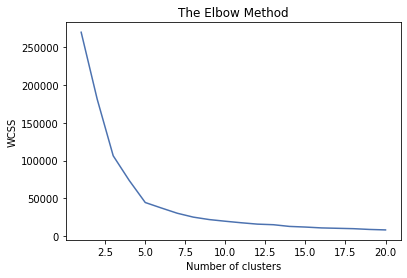

In [5]:
plt.figure()
plt.plot(range(1,21), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [6]:
k=5
kmeans = KMeans(n_clusters=k)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 1,
       4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 3, 0, 1, 0, 3, 0, 3, 0,
       1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0])

In [7]:
Group_cluster=pd.DataFrame(y_kmeans)
Group_cluster.columns=['Group']
full_data=pd.concat([data, Group_cluster], axis=1)
full_data

,ID,Gender,Age,Income,Spend,Group
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,3
197,198,Male,32,126,74,0
198,199,Male,32,137,18,3


In [8]:
kmeans_pred=KMeans(n_clusters=k, random_state=42).fit(X)
kmeans_pred.cluster_centers_

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])

In [9]:
kmeans_pred.predict([[100, 50], [30, 80]])

array([4, 3])

In [10]:
labels = [('Cluster' + str(i+1)) for i in range(k)]
labels

['Cluster1', 'Cluster2', 'Cluster3', 'Cluster4', 'Cluster5']

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

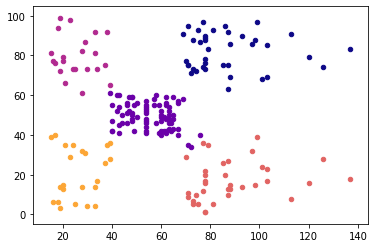

In [11]:
X=np.array(X)
plt.figure()
for i in range(k):
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], s=20, c = cmap(i/k), label=labels[i])

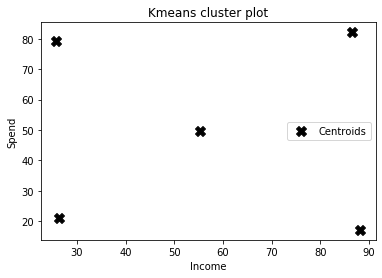

In [12]:
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
           s=100, c='black', label='Centroids', marker='X')
plt.xlabel('Income')
plt.ylabel('Spend')
plt.title('Kmeans cluster plot')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

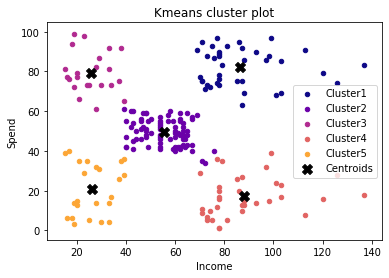

In [14]:
plt.figure()
for i in range(k):
    plt.scatter(X[y_kmeans==i,0], X[y_kmeans==i, 1], s=20, c=cmap(i/k), label=labels[i])
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, 
            c='black', label='Centroids', marker='X')
plt.xlabel('Income')
plt.ylabel('Spend')
plt.title('Kmeans cluster plot')
plt.legend()
plt.show()

In [15]:
## k-mean Clustering
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [17]:
iris = pd.read_csv("C:/Users/MJ/Desktop/새 폴더 (2)/[2] 교재 data/iris.csv", encoding="UTF-8-sig")
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [18]:
X_iris = iris.drop(['class'], axis=1)
y_iris = iris["class"]
X_iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
y_iris.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: class, dtype: object

In [20]:
X_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [22]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
scale.fit(X_iris)
X_scale=scale.transform(X_iris)
pd.DataFrame(X_scale).head()

,0,1,2,3
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [23]:
K = range(1,10)
KM = [KMeans(n_clusters=k).fit(X_scale) for k in K]
centroids = [k.cluster_centers_ for k in KM]

In [24]:
D_K = [cdist(X_iris, centrds, 'euclidean') for centrds in centroids]
D_K

[array([[ 6.34507683],
        [ 5.91692488],
        [ 5.83609458],
        [ 5.7497826 ],
        [ 6.32139225],
        [ 6.88621812],
        [ 5.8966092 ],
        [ 6.23297682],
        [ 5.45618915],
        [ 5.98999165],
        [ 6.71863081],
        [ 6.09918027],
        [ 5.83180932],
        [ 5.35817133],
        [ 7.14982517],
        [ 7.36613874],
        [ 6.79852925],
        [ 6.34901567],
        [ 7.06470098],
        [ 6.54140658],
        [ 6.60681466],
        [ 6.48922183],
        [ 5.92958683],
        [ 6.32771681],
        [ 6.18465844],
        [ 6.04979338],
        [ 6.26737585],
        [ 6.44825558],
        [ 6.37181293],
        [ 5.91016074],
        [ 5.93717104],
        [ 6.56734345],
        [ 6.79043445],
        [ 7.06328535],
        [ 5.98999165],
        [ 6.05970296],
        [ 6.65056389],
        [ 5.98999165],
        [ 5.48543526],
        [ 6.31347765],
        [ 6.24739946],
        [ 5.22685374],
        [ 5.59732079],
        [ 6

In [26]:
cIdx = [np.argmin(D, axis=1) for D in D_K]
dist = [np.min(D,axis=1) for D in D_K]
avgWithinSS = [sum(d)/X_scale.shape[0] for d in dist]

In [27]:
## Total with-in sum of square
wcss = [sum(d**2) for d in dist]
tss = sum(pdist(X_scale)**2)/X_scale.shape[0]
bss = tss-wcss

Text(0.5, 1.0, 'Elbow for KMeans clustering')

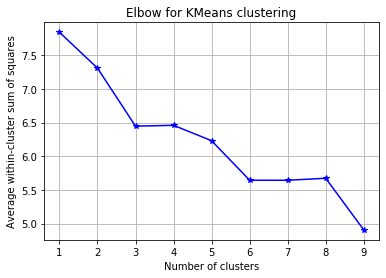

In [28]:
## elbow curve - Avg. within-cluster sum of squares
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, avgWithinSS, 'b*-')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow for KMeans clustering')

Text(0.5, 1.0, 'Elbow for KMeans clustering')

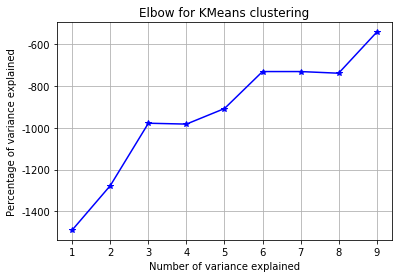

In [29]:
## elbow curve - percentage of variance explained
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, bss/tss*100, 'b*-')
plt.grid(True)
plt.xlabel('Number of variance explained')
plt.ylabel('Percentage of variance explained')
plt.title('Elbow for KMeans clustering')

In [30]:
## Calculation of eigenvectors & eigenvalues
import numpy as np
w,v = np.linalg.eig(np.array([[0.91335, 0.75969],[0.75969, 0.69702]]))
print("\nEigen Values\n", w)
print("\nEigen Vectors\n", v)


Eigen Values
 [1.57253666 0.03783334]

Eigen Vectors
 [[ 0.75530088 -0.6553782 ]
 [ 0.6553782   0.75530088]]


In [31]:
k_means_fit = KMeans(n_clusters=4, max_iter=300)
k_means_fit.fit(X_scale)

KMeans(n_clusters=4)

In [32]:
k_means_fit.cluster_centers_

array([[ 1.13597027,  0.09659843,  0.996271  ,  1.01717187],
       [-0.73463631,  1.45201075, -1.29704352, -1.21071997],
       [-0.05021989, -0.88029181,  0.34753171,  0.28206327],
       [-1.34320731,  0.12656736, -1.31407576, -1.30726051]])

In [34]:
print("\nK-Means Clustering - Confusion Matrix\n\n",
     pd.crosstab(y_iris, k_means_fit.labels_, rownames = ['Actuall'], colnames=["Predicted"]))


K-Means Clustering - Confusion Matrix

 Predicted         0   1   2   3
Actuall                        
Iris-setosa       0  27   0  23
Iris-versicolor  11   0  39   0
Iris-virginica   36   0  14   0


In [35]:
print("\nSilhouette-score: %0.3f" % silhouette_score(X_iris, k_means_fit.labels_, metric='euclidean'))


Silhouette-score: 0.366


In [36]:
for k in range(2, 10):
    k_means_fitk = KMeans(n_clusters=k, max_iter=300)
    k_means_fitk.fit(X_iris)
    print("For K value", k, ", Silhouette-score: %0.3f"%
          silhouette_score(X_iris, k_means_fitk.labels_, metric='euclidean'))

For K value 2 , Silhouette-score: 0.681
For K value 3 , Silhouette-score: 0.553
For K value 4 , Silhouette-score: 0.498
For K value 5 , Silhouette-score: 0.491
For K value 6 , Silhouette-score: 0.369
For K value 7 , Silhouette-score: 0.351
For K value 8 , Silhouette-score: 0.363
For K value 9 , Silhouette-score: 0.354


In [37]:
## Hierarchical Clustering
## k-means는 비계층적 방법이라고도 하며, 분석속도가 빠르고 군집을 형성하면서 유연하게 다른 군집으로 다시 
## 재군집화가 가능한 반면, 계층적 군집분석은 한번 어떤 군집에 속한 개체는 분석과정에서 다른 군집과 
## 더 가깝게 계산되어도 다른 군집화가 허용되지 않는 방법이다. 속도로 오래 걸린다.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')
import matplotlib.cm
cmap = matplotlib.cm.get_cmap('plasma')

In [38]:
## Reading in data
data = pd.read_csv("C:/Users/MJ/Desktop/새 폴더 (2)/[2] 교재 data/Mall_Customers.csv", 
                   encoding="UTF-8-sig")
X = data.iloc[:, [3,4]].values

In [40]:
# Dendrogram to choose number of clusters (k)
import scipy.cluster.hierarchy as sch

findfont: Font family ['Hancom Gothic Regular'] not found. Falling back to DejaVu Sans.


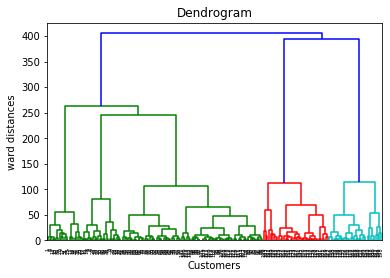

In [41]:
plt.figure(1)
z = sch.linkage(X, method = 'ward')
dendrogram = sch.dendrogram(z)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('ward distances')
plt.show()

In [43]:
k = 5
# Clustering
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=k, affinity="euclidean", linkage='ward')
y_hc=hc.fit_predict(X)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

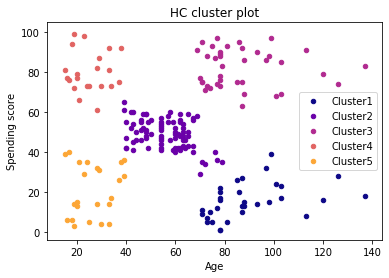

In [44]:
labels = [('Cluster' + str(i+1)) for i in range(k)]
plt.figure(2)
for i in range(k):
    plt.scatter(X[y_hc == i, 0], X[y_hc == i, 1], s =20, c = cmap(i/k), label = labels[i])
plt.xlabel('Age')
plt.ylabel('Spending score')
plt.title('HC cluster plot')
plt.legend()
plt.show()

In [45]:
## Section 17 DBSCAN
## 17.1 핵심 개념
## 밀도기반 클러스터링 기법 
## 이 방법은 케이스가 집중되어 있는 밀도에 초점을 두어 밀도가 높은 그룹을 클러스터링 하는 방식이다.
## 중심점을 기준으로 특정한 반경 이내에 케이스가 n개 이상 있을 경우 하나의 군집을 형성하는 알고리즘
## epsilon 근접 이웃점을 찾기 위해 정의 내려야 하는 반경 거리 
## minpts(최소점) 하나의 군집을 형성하기 위해 필요한 최소 케이스 
## core point 엡실런 반경 내에 최소점 이상을 갖는 점 
## Border point core point의 엡실런 반경 내에 있으나 그 자체로는 최소점을 갖지 못하는 점 
## Noise point core point도 아니고 border point도 아닌 점 

import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
iris = pd.read_csv("C:/Users/MJ/Desktop/새 폴더 (2)/[2] 교재 data/iris.csv", encoding="UTF-8-sig")
iris_data = iris[iris.columns[0:4]]
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [47]:
## DBSCAN 모델 적용 
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, metric='euclidean', min_samples=5)
dbscan

DBSCAN()

In [48]:
dbscan.fit(iris_data)
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [49]:
pred=dbscan.fit_predict(iris_data)
pred=pd.DataFrame(pred)
pred.columns=['predict']
pred.head()

,predict
0,0
1,0
2,0
3,0
4,0


In [50]:
match_data = pd.concat([iris,pred],axis=1)
match_data.head()

,sepal_length,sepal_width,petal_length,petal_width,class,predict
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [51]:
cross = pd.crosstab(match_data['class'], match_data['predict'])
cross

predict,-1,0,1
class,,,
Iris-setosa,1,49,0
Iris-versicolor,6,0,44
Iris-virginica,10,0,40


In [52]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(iris_data)
pca_2d = pca.transform(iris_data)

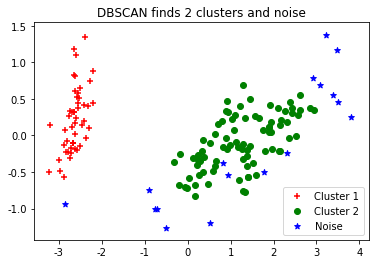

In [53]:
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c='g', marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c='b', marker='*')
plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Noise'])
plt.title('DBSCAN finds 2 clusters and noise')
plt.show()

In [54]:
## Section18 연관규칙분석
## 연관규칙은 Apriori Algorithm이라고도 하며, 대용량의 트랜잭션 데이터로부터 X면 Y이다 라는 식의 
## 연관관계를 발견하는 기법이다. 장바구니 분석,
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd

In [55]:
data = pd.read_csv('C:/Users/MJ/Desktop/새 폴더 (2)/[2] 교재 data/Market_Basket.csv',
                  encoding='UTF-8-sig')
data.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   shrimp             7500 non-null   object 
 1   almonds            5746 non-null   object 
 2   avocado            4388 non-null   object 
 3   vegetables mix     3344 non-null   object 
 4   green grapes       2528 non-null   object 
 5   whole weat flour   1863 non-null   object 
 6   yams               1368 non-null   object 
 7   cottage cheese     980 non-null    object 
 8   energy drink       653 non-null    object 
 9   tomato juice       394 non-null    object 
 10  low fat yogurt     255 non-null    object 
 11  green tea          153 non-null    object 
 12  honey              86 non-null     object 
 13  salad              46 non-null     object 
 14  mineral water      24 non-null     object 
 15  salmon             7 non-null      object 
 16  antioxydant juice  3 non

In [78]:
transactions = []
for i in range(data.shape[0]):
    for j in range(data.shape[1]-data.isnull().sum(axis=1)[i]):
        transactions.append([str(data[j][i])])
                            
transactions

KeyError: 0

In [67]:
data.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
!pip install apyori
from apyori import apriori

In [65]:
!pip install --upgrade pip --user

In [68]:
rules = apriori(transactions, min_support = 0.015, min_confidence=0.2, min_lift=1, min_length=1)

In [70]:
results = list(rules)
results

[]

In [71]:
print(len(results))

0


In [ ]:
df=pd.DataFrame(results)
df

In [ ]:
df.to_csv('apriori_result.csv')
print(df.iloc[6:19][['items', 'support']])

In [ ]:
ar=(df.iloc[1:74]['items'])
ar

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(9,6))
G = nx.Graph()
G.add_edges_from(ar)
pos = nx.spring_layout(G)
nx.draw(G, pos, font_size=16, with_labels=False, edge_color='green',
       node_size=800, node_color=['red', 'green', 'blue', 'cyan', 'orange', 'magenta'])
for p in pos:
    pos[p][1] += 0.07
nx.draw_networkx_labels(G, pos)
plt.show()
